In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zb-da3-competition/BankChurners_.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/zb-da3-competition/BankChurners_.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [3]:
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

# EDA

In [4]:
df.shape

(10127, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Categorial Data

In [7]:
col_obj=df.select_dtypes(include='object').columns
col_obj

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [8]:
df_obj=df[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']]

# Aggregate the DataFrame to collect unique values in each column and convert them to strings
unique_values_df = df_obj.agg(lambda x: ', '.join(sorted(x.astype(str).unique()))).to_frame().reset_index()

# Count the unique values
unique_values_counts = df_obj.agg(lambda x: x.nunique()).to_frame().reset_index()

# Merge unique values and their counts into a single DataFrame
unique_values_df = unique_values_df.merge(unique_values_counts, on='index')

# Rename the columns for clarity
unique_values_df.columns = ['Column Name', 'Unique Values', 'Unique Values Count']

# Set pandas to display the full content of each column
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
unique_values_df

Column Name  \
0   Attrition_Flag   
1           Gender   
2  Education_Level   
3   Marital_Status   
4  Income_Category   
5    Card_Category   

                                                                   Unique Values  \
0                                           Attrited Customer, Existing Customer   
1                                                                           F, M   
2  College, Doctorate, Graduate, High School, Post-Graduate, Uneducated, Unknown   
3                                             Divorced, Married, Single, Unknown   
4       $120K +, $40K - $60K, $60K - $80K, $80K - $120K, Less than $40K, Unknown   
5                                                   Blue, Gold, Platinum, Silver   

   Unique Values Count  
0                    2  
1                    2  
2                    7  
3                    4  
4                    6  
5                    4

[Educational Level]\
Doctorate\
Post-Graduate\
Graduate\
College\
High School\
Uneducated


[Card_Category]\
Platinum\
Gold\
Silver\
Blue

In [9]:
col_num=df.select_dtypes(exclude='object').columns
col_num

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
df_num=df[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Trans_Ct']]

# Aggregate the DataFrame to collect unique values in each column and convert them to strings
unique_values_df = df_num.agg(lambda x: ', '.join(sorted(x.astype(str).unique()))).to_frame().reset_index()

# Count the unique values
unique_values_counts = df_num.agg(lambda x: x.nunique()).to_frame().reset_index()

# Merge unique values and their counts into a single DataFrame
unique_values_df = unique_values_df.merge(unique_values_counts, on='index')

# Rename the columns for clarity
unique_values_df.columns = ['Column Name', 'Unique Values', 'Unique Values Count']

# Set pandas to display the full content of each column
# pd.set_option('display.max_colwidth', None)

# Display the DataFrame
unique_values_df

Column Name  \
0              Customer_Age   
1           Dependent_count   
2            Months_on_book   
3  Total_Relationship_Count   
4    Months_Inactive_12_mon   
5     Contacts_Count_12_mon   
6            Total_Trans_Ct   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Unique Values  \
0                                                                                                                                                                                                                                                                                                                                                                          26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            0, 1, 2, 3, 4, 5   
2                                                                                                                                                                                                                                                                                                                                                                              13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            1, 2, 3, 4, 5, 6   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         0, 1, 2, 3, 4, 5, 6   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [11]:
df['CLIENTNUM'].nunique()

10127

### Correlation

In [12]:
df['Attrition_Flag_binary'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
df[['Attrition_Flag','Attrition_Flag_binary']]

Attrition_Flag  Attrition_Flag_binary
0      Existing Customer                      0
1      Existing Customer                      0
2      Existing Customer                      0
3      Existing Customer                      0
4      Existing Customer                      0
...                  ...                    ...
10122  Existing Customer                      0
10123  Attrited Customer                      1
10124  Attrited Customer                      1
10125  Attrited Customer                      1
10126  Attrited Customer                      1

[10127 rows x 2 columns]

In [13]:
from scipy.stats import pointbiserialr, chi2_contingency

col_num=['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Dictionary to hold correlations and p-values
correlations = {}

# Calculate point-biserial correlation for each numeric column
for col in col_num:
    corr, p_value = pointbiserialr(df['Attrition_Flag_binary'], df[col])
    correlations[col] = {'Correlation': corr, 'P-Value': p_value}

# Create a DataFrame from the correlations dictionary
correlation_data = {
    'Column': [],
    'Correlation': [],
    'P-Value': []
}

for k, v in correlations.items():
    correlation_data['Column'].append(k)
    correlation_data['Correlation'].append(v['Correlation'])
    correlation_data['P-Value'].append(v['P-Value'])

correlation_df = pd.DataFrame(correlation_data)

# Sort the DataFrame by the absolute value of the correlation coefficient, descending
correlation_df = correlation_df.sort_values(by='P-Value', ascending=True)

# Reset index after sorting
correlation_df = correlation_df.reset_index(drop=True)

# Display the DataFrame
# pd.set_option('display.float_format', lambda x: '%.20f' % x)
pd.reset_option('display.float_format')
correlation_df

Column  Correlation        P-Value
0             Total_Trans_Ct    -0.371403   0.000000e+00
1        Total_Ct_Chng_Q4_Q1    -0.290054  1.647725e-195
2        Total_Revolving_Bal    -0.263053  6.630148e-160
3      Contacts_Count_12_mon     0.204491   4.697490e-96
4      Avg_Utilization_Ratio    -0.178410   3.357689e-73
5            Total_Trans_Amt    -0.168598   1.857439e-65
6     Months_Inactive_12_mon     0.152449   1.032664e-53
7   Total_Relationship_Count    -0.150005   4.829281e-52
8       Total_Amt_Chng_Q4_Q1    -0.131063   4.836643e-40
9               Credit_Limit    -0.023873   1.628536e-02
10           Dependent_count     0.018991   5.600239e-02
11              Customer_Age     0.018203   6.698689e-02
12            Months_on_book     0.013687   1.684370e-01
13           Avg_Open_To_Buy    -0.000285   9.771161e-01

In [14]:
correlation_df[correlation_df['P-Value'] < 0.05]

Column  Correlation        P-Value
0            Total_Trans_Ct    -0.371403   0.000000e+00
1       Total_Ct_Chng_Q4_Q1    -0.290054  1.647725e-195
2       Total_Revolving_Bal    -0.263053  6.630148e-160
3     Contacts_Count_12_mon     0.204491   4.697490e-96
4     Avg_Utilization_Ratio    -0.178410   3.357689e-73
5           Total_Trans_Amt    -0.168598   1.857439e-65
6    Months_Inactive_12_mon     0.152449   1.032664e-53
7  Total_Relationship_Count    -0.150005   4.829281e-52
8      Total_Amt_Chng_Q4_Q1    -0.131063   4.836643e-40
9              Credit_Limit    -0.023873   1.628536e-02

In [15]:
print(correlation_df['Column'].tolist())

['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Months_Inactive_12_mon', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1', 'Credit_Limit', 'Dependent_count', 'Customer_Age', 'Months_on_book', 'Avg_Open_To_Buy']


In [16]:
# Optionally, perform chi-square test for categorical variables
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

chi2_data = {
    'Column': [],
    'Chi2': [],
    'P-Value': []
}

for col in categorical_cols:
    contingency_table = pd.crosstab(df['Attrition_Flag'], df[col])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    chi2_data['Column'].append(col)
    chi2_data['Chi2'].append(chi2)
    chi2_data['P-Value'].append(p)
    
#     print(f"Chi-square test result for Attrition_Flag vs {col}: Chi2 = {chi2:.2f}, p = {p:.3f}")

df_chi2 = pd.DataFrame(chi2_data).sort_values(by='P-Value', ascending=True)
df_chi2

Column       Chi2   P-Value
0           Gender  13.865614  0.000196
3  Income_Category  12.832259  0.025002
1  Education_Level  12.511205  0.051489
2   Marital_Status   6.056097  0.108913
4    Card_Category   2.234227  0.525238

In summary, a high χ² value with a low p-value suggests a significant association between the variables.

In [17]:
df_chi2['Column'].tolist()

['Gender',
 'Income_Category',
 'Education_Level',
 'Marital_Status',
 'Card_Category']

# Visualization

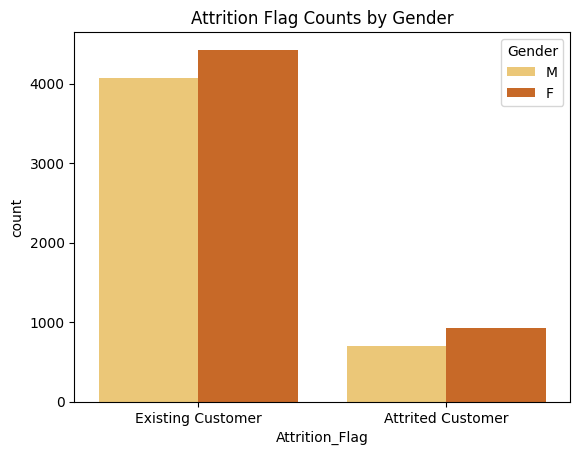

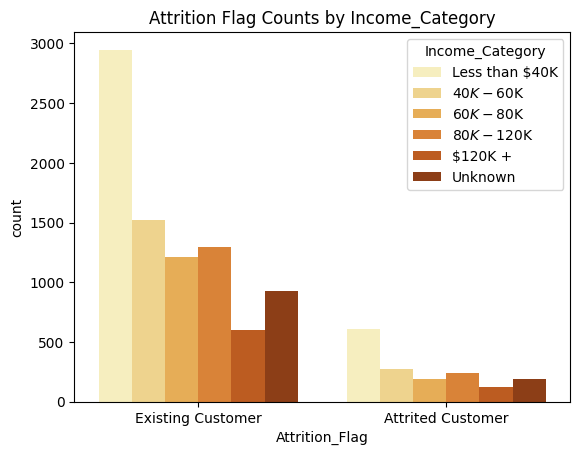

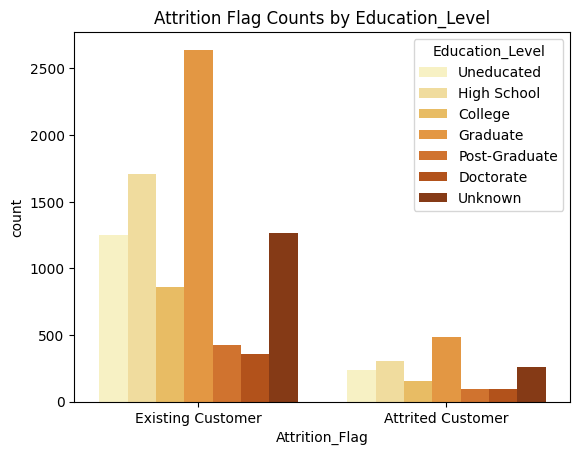

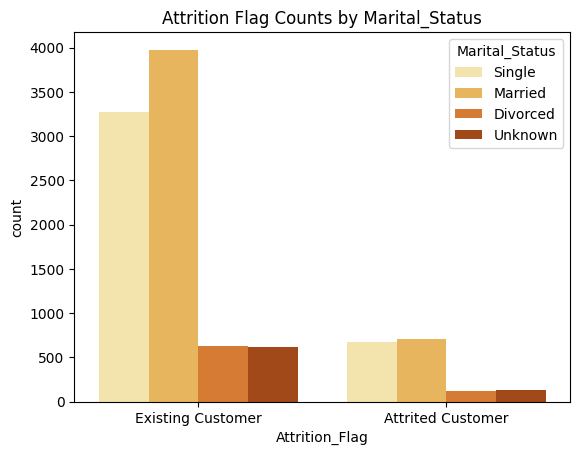

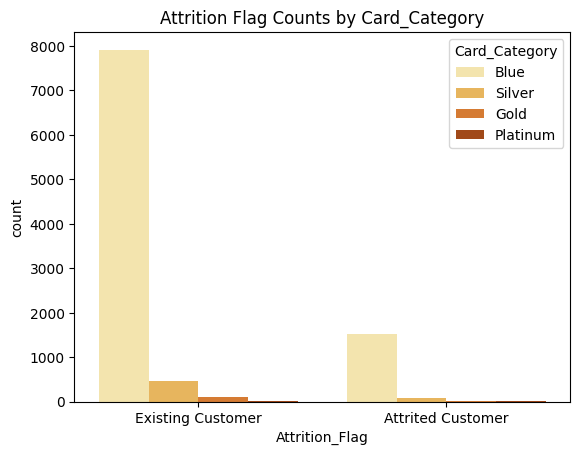

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

col_ctgr_by_chi2=['Gender',
 'Income_Category',
 'Education_Level',
 'Marital_Status',
 'Card_Category']

order_dict = {
    'Gender': ['M', 'F'], # 예시 순서
    'Income_Category': ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'], # 예시 순서
    'Education_Level': ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown'], # 예시 순서
    'Marital_Status': ['Single', 'Married', 'Divorced', 'Unknown'], # 예시 순서
    'Card_Category': ['Blue', 'Silver', 'Gold', 'Platinum'] # 예시 순서
}

for col in col_ctgr_by_chi2:
    sns.countplot(x='Attrition_Flag', hue=col, data=df, hue_order=order_dict[col], palette='YlOrBr')
    plt.title(f'Attrition Flag Counts by {col}')
    plt.show()

In [19]:
pivot_tables = {}
for col in col_ctgr_by_chi2:
    pivot_tables[col] = pd.pivot_table(df, index=col, columns='Attrition_Flag', aggfunc='size')

pivot_tables_ratio = {}
for col, table in pivot_tables.items():
    # Calculate the ratio
    pivot_tables_ratio[col] = table.div(table.sum(axis=1), axis=0)

# Now you can access each pivot table by the column name
for col, table in pivot_tables.items():
    print(f"Pivot Table for {col}:")
    print(table)
    print()  # Print a new line for better readability between tables
    
for col, table in pivot_tables_ratio.items():
    print(f"Pivot Table Ratios for {col}:")
    print(table)
    print()  # Print a new line for better readability
#     table.to_frame()
#     table

Pivot Table for Gender:
Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                             930               4428
M                             697               4072

Pivot Table for Income_Category:
Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                        126                601
$40K - $60K                    271               1519
$60K - $80K                    189               1213
$80K - $120K                   242               1293
Less than $40K                 612               2949
Unknown                        187                925

Pivot Table for Education_Level:
Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                        154                859
Doctorate                       95                356
Graduate                       487              

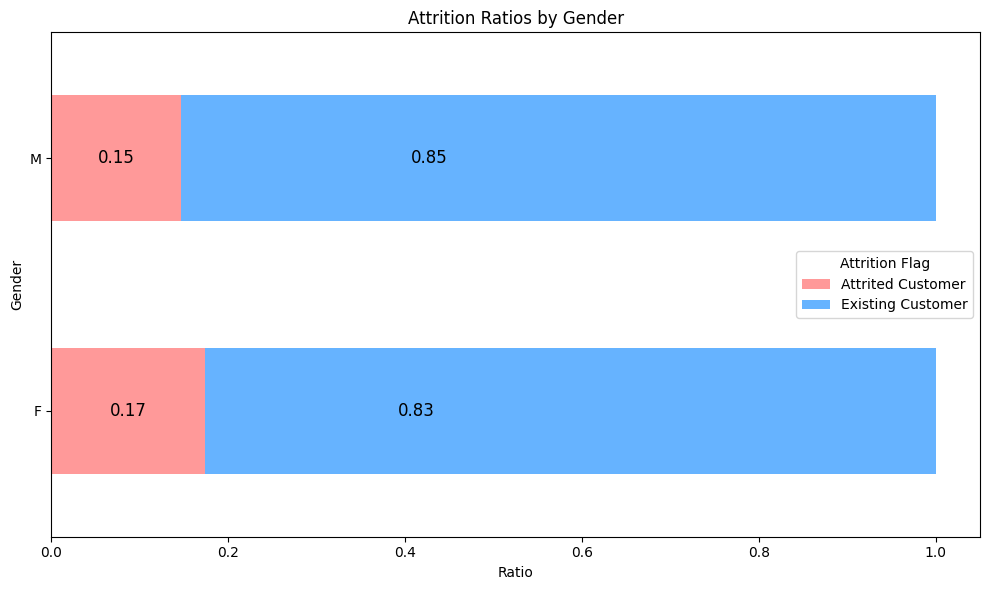

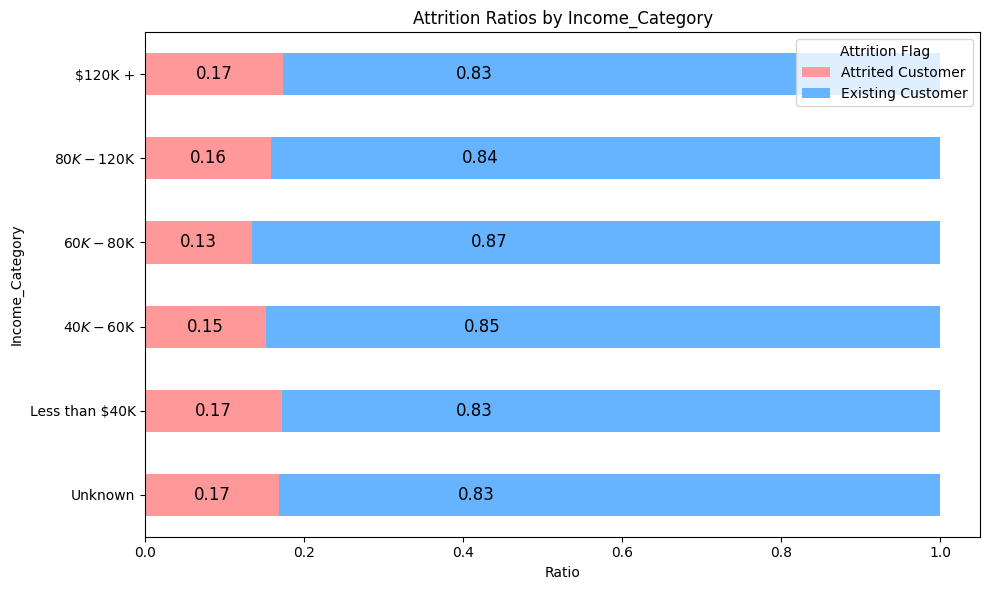

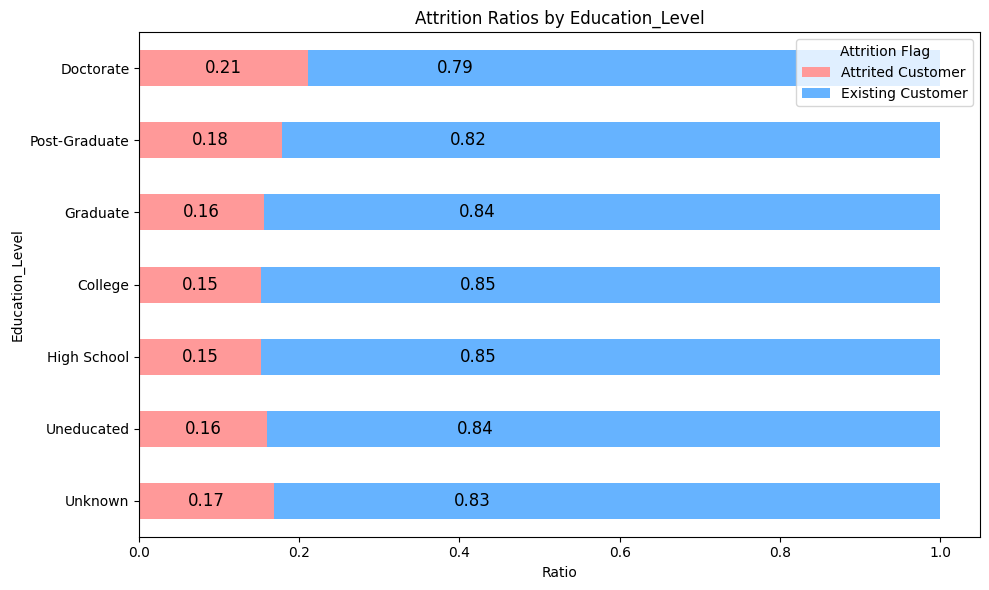

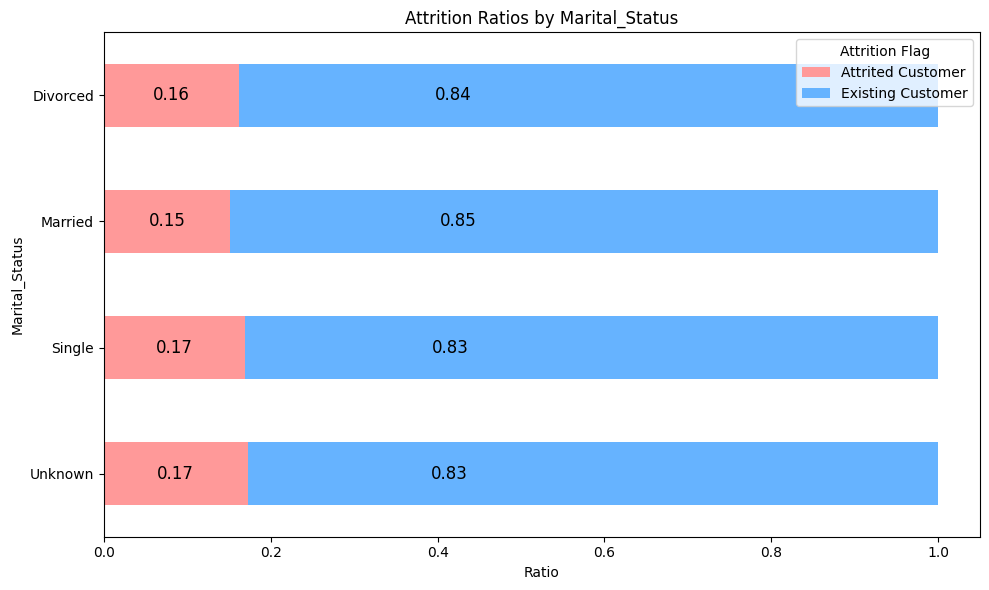

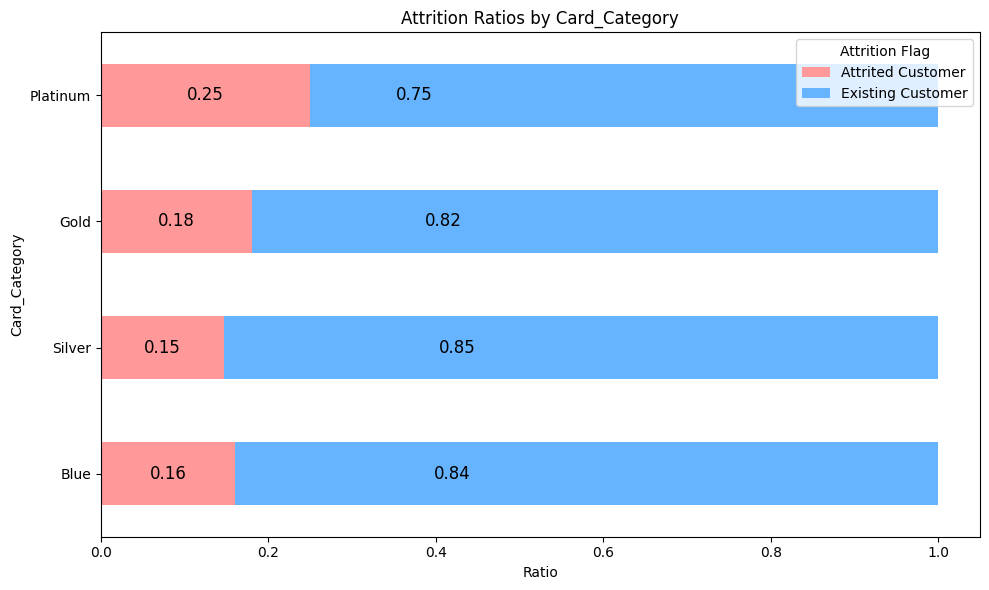

In [20]:
order_dict_v = {
    'Gender': ['F', 'M', ], # 예시 순서
    'Income_Category': ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', ], # 예시 순서
    'Education_Level': ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', ], # 예시 순서
    'Marital_Status': ['Unknown', 'Single', 'Married', 'Divorced', ], # 예시 순서
    'Card_Category': ['Blue', 'Silver', 'Gold', 'Platinum'] # 예시 순서
}

for col, table in pivot_tables_ratio.items():
     # Reorder the table based on the 'order_dict' for the current column if it exists
    if col in order_dict_v:
        # Reindex the table based on the custom order specified in 'order_dict'
        table = table.reindex(order_dict_v[col])
        
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and a set of subplots with custom size
    
     # Capture the return value of the plot which contains the bar containers
    bar_containers = table.plot(kind='barh', stacked=True, color=['#ff9999', '#66b3ff'], ax=ax).containers
    
#     table.plot(kind='barh', stacked=True, color=['#ff9999','#66b3ff'], ax=ax)  # Stacked horizontal bar plot
    ax.set_xlabel('Ratio')  # X-axis label
    ax.set_title(f'Attrition Ratios by {col}')  # Title of the plot
    ax.legend(title='Attrition Flag')  # Legend with title
    
    # Annotate each bar
    for container in bar_containers:
        x=0
        for bar in container:
#             print(bar)
#             Format the number to be displayed. You can adjust the formatting to your preference
            value = f'{bar.get_width():.2f}'

            ax.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2, value, 
                        va='center', ha='center', fontsize=12, color='black')
            
        
    plt.tight_layout()  # Adjust subplots to give some padding

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


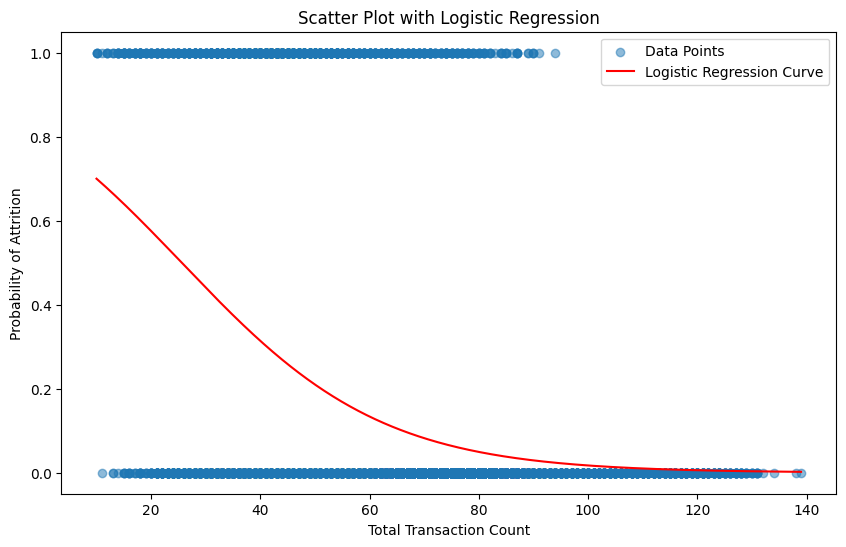

In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
model = LogisticRegression()

# Fit the model
X = df[['Total_Trans_Ct']]  # Use double brackets to get a DataFrame shape
y = df['Attrition_Flag_binary']
model.fit(X, y)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Trans_Ct'], y, alpha=0.5, label='Data Points')

# Generate a sequence of numbers from min to max
x_values = np.linspace(df['Total_Trans_Ct'].min(), df['Total_Trans_Ct'].max(), 1000).reshape(-1, 1)

# Predict probabilities
y_proba = model.predict_proba(x_values)[:, 1]

# Plot the logistic regression curve
plt.plot(x_values, y_proba, color='red', label='Logistic Regression Curve')

plt.title('Scatter Plot with Logistic Regression')
plt.xlabel('Total Transaction Count')
plt.ylabel('Probability of Attrition')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


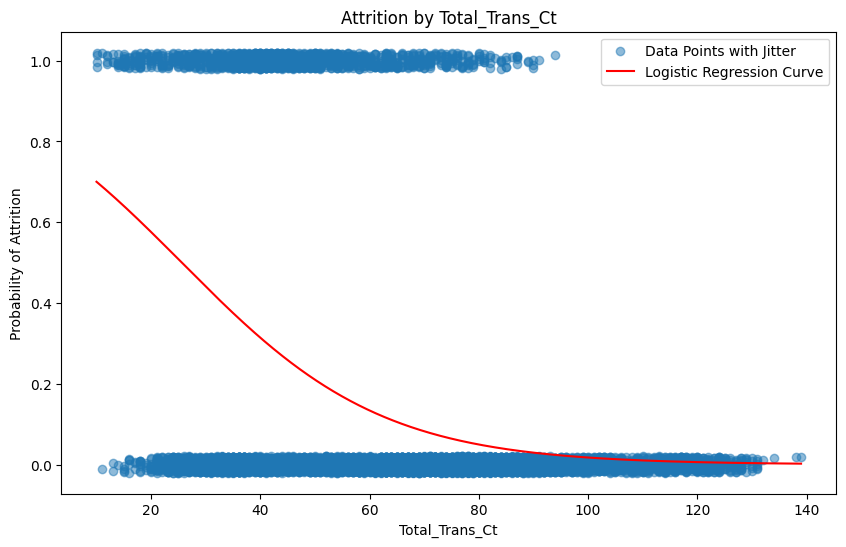

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


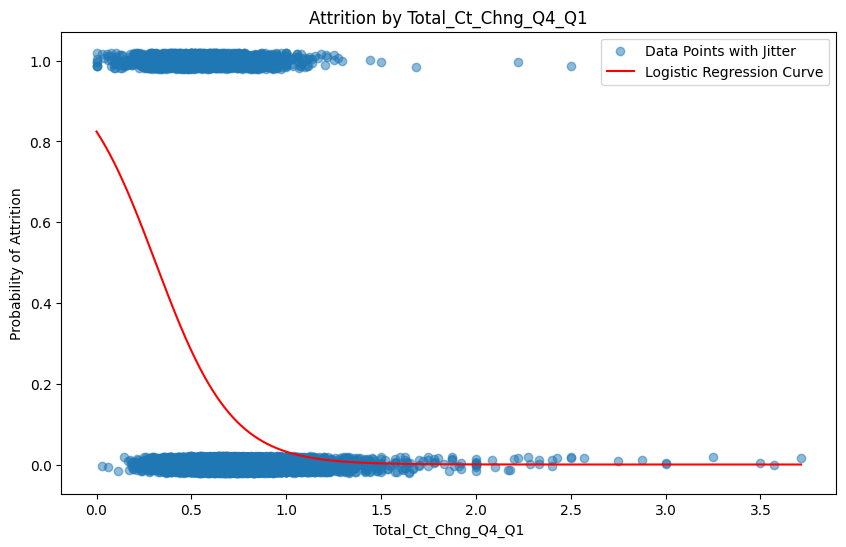

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


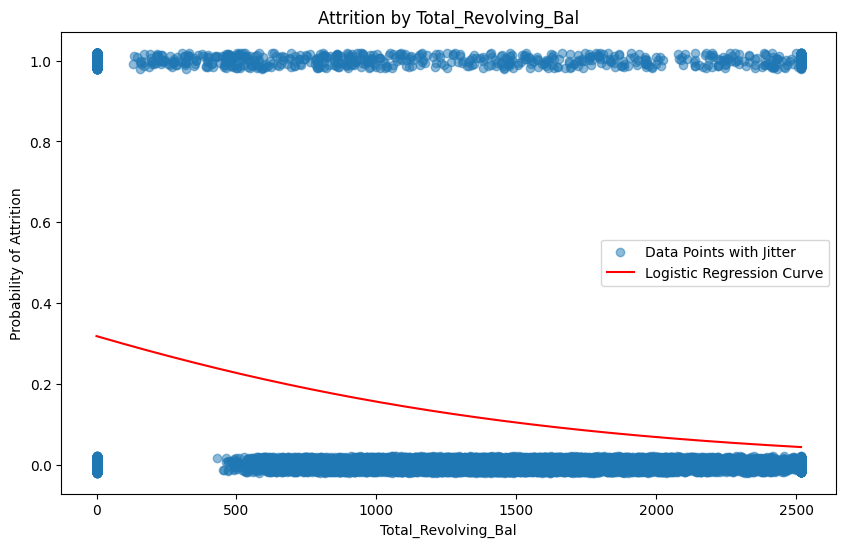

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


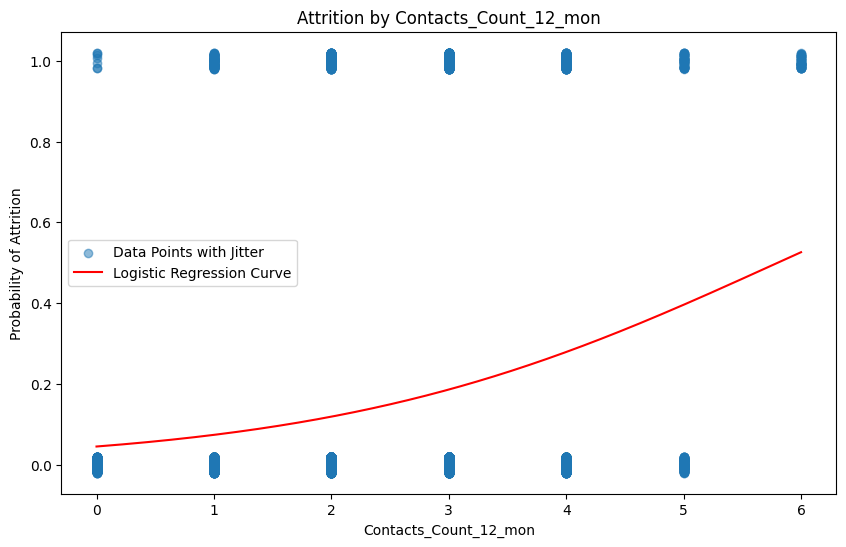

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


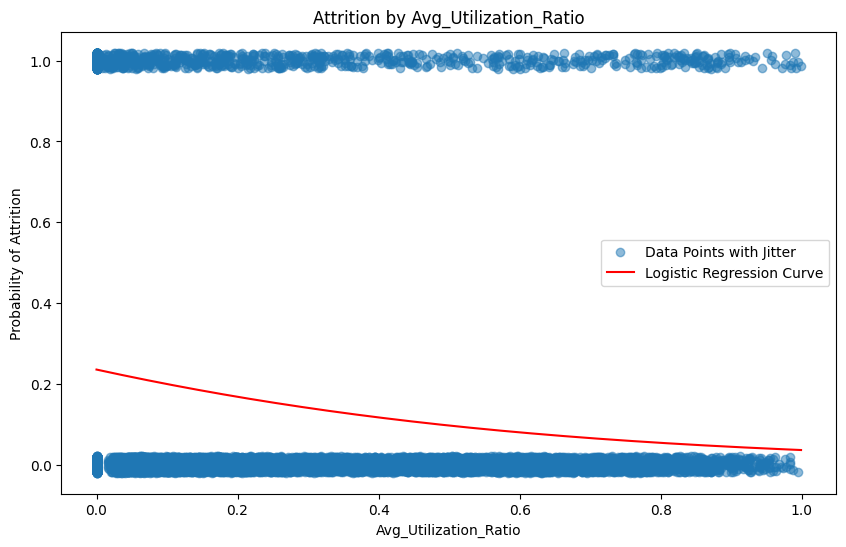

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


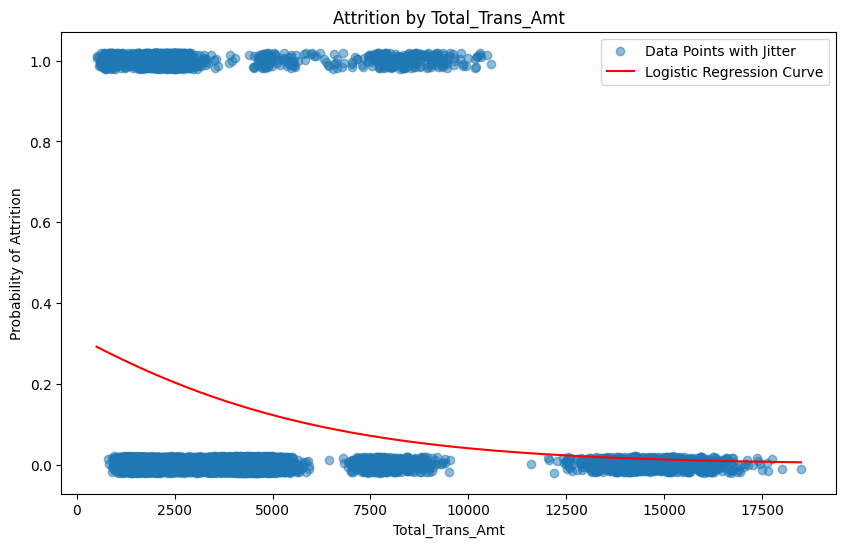

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


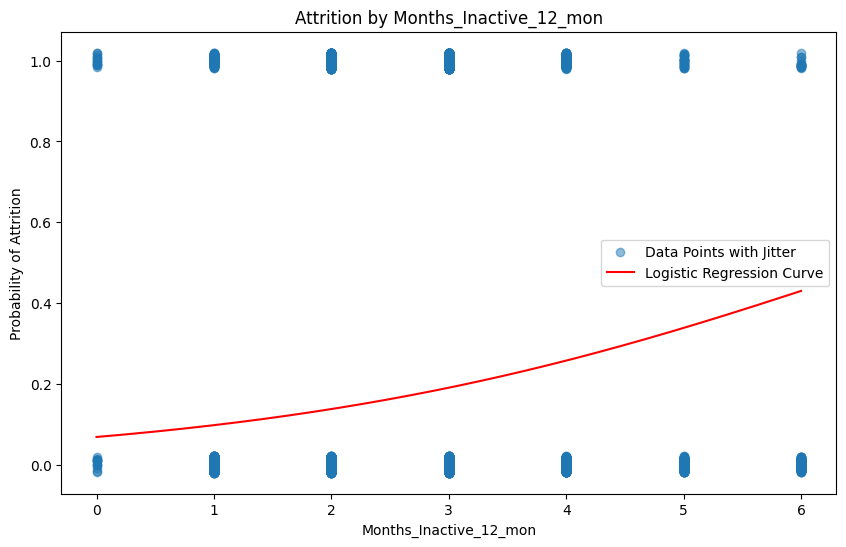

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


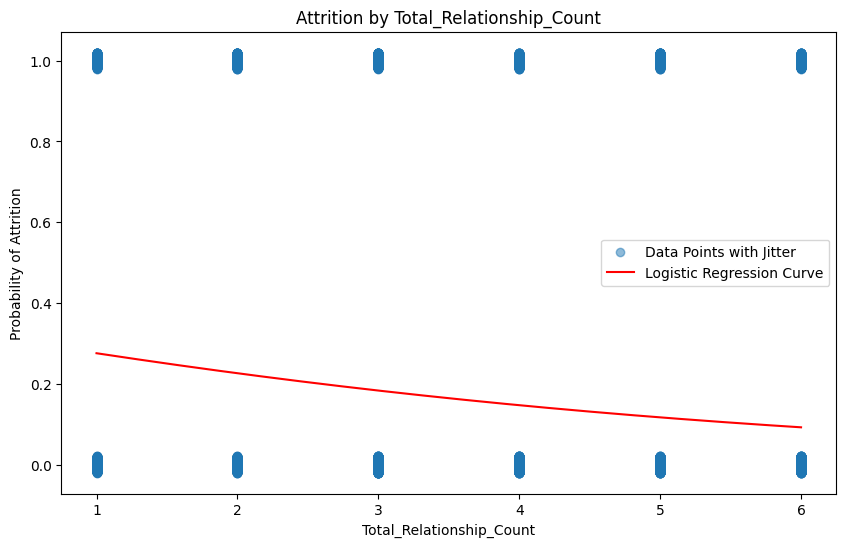

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


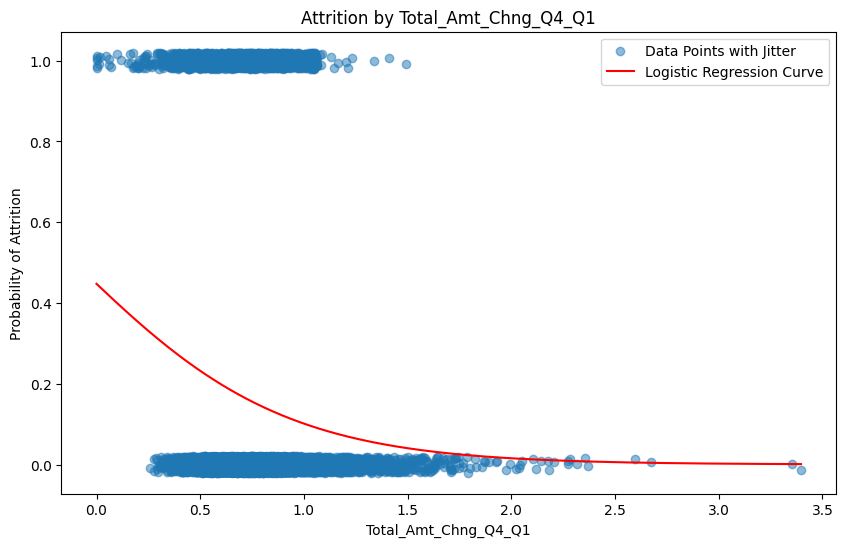

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


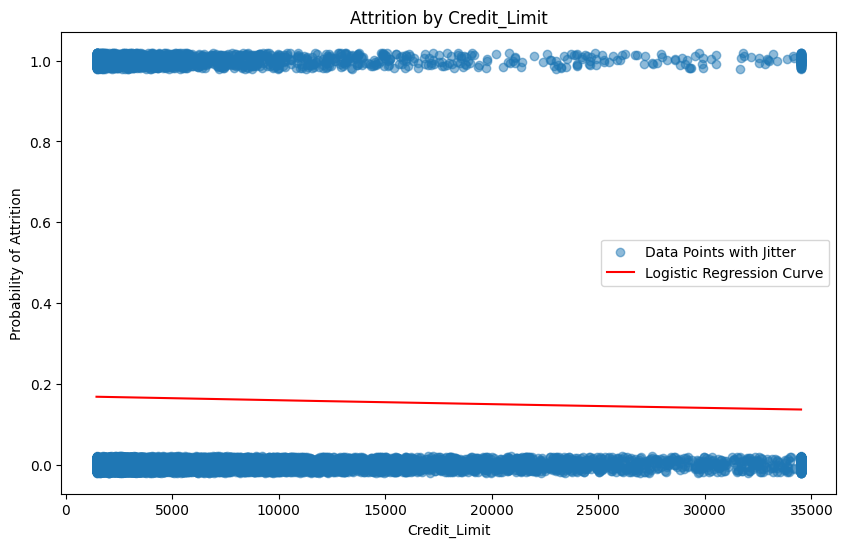

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


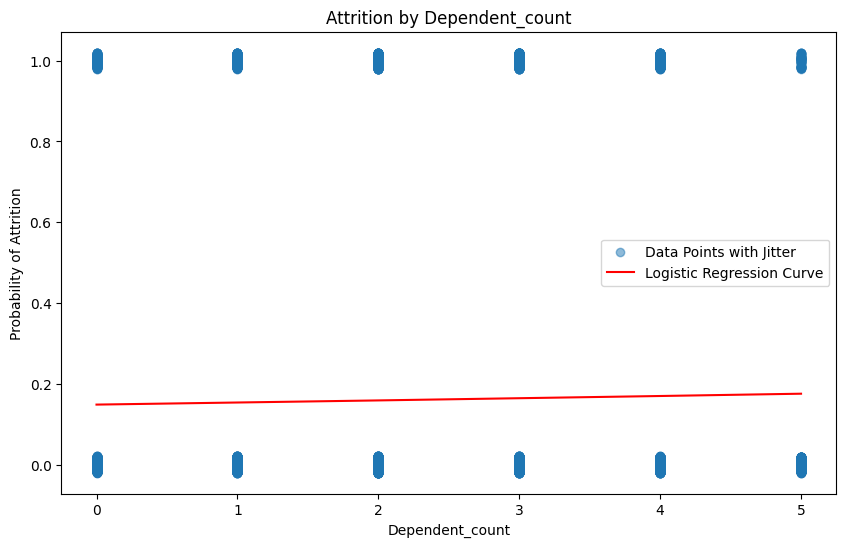

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


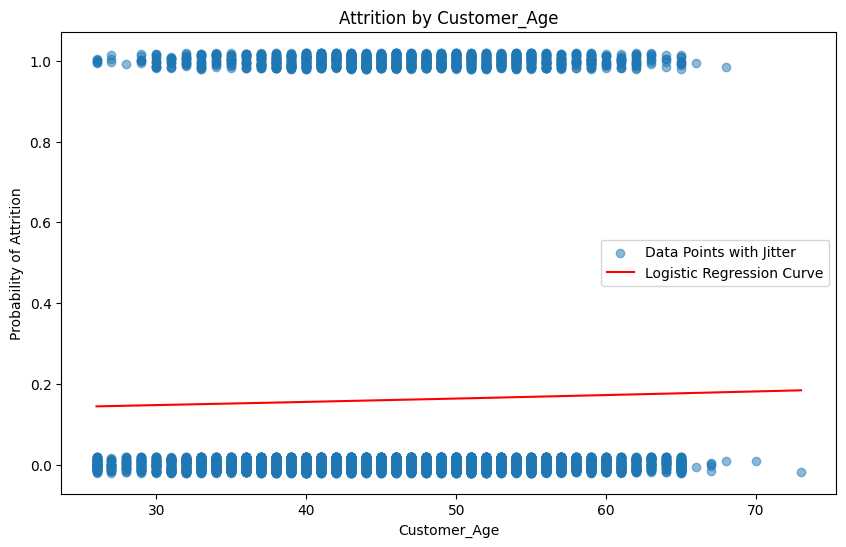

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


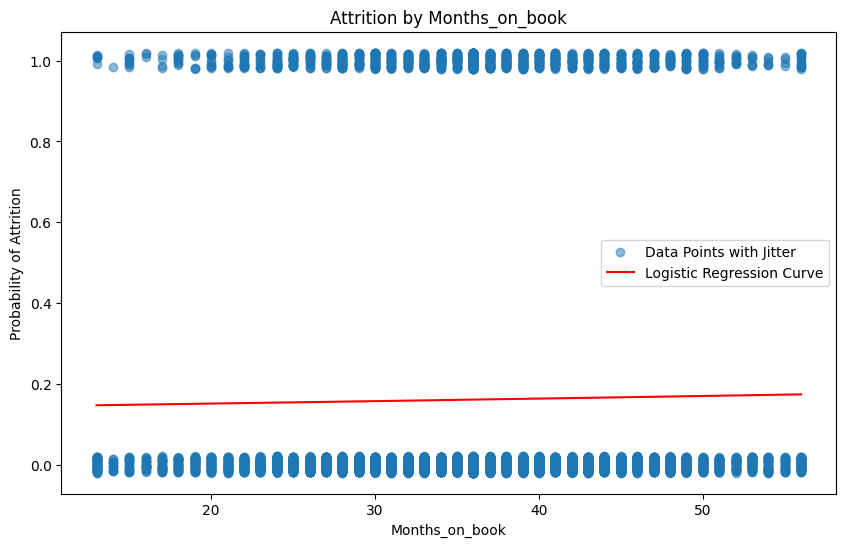

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


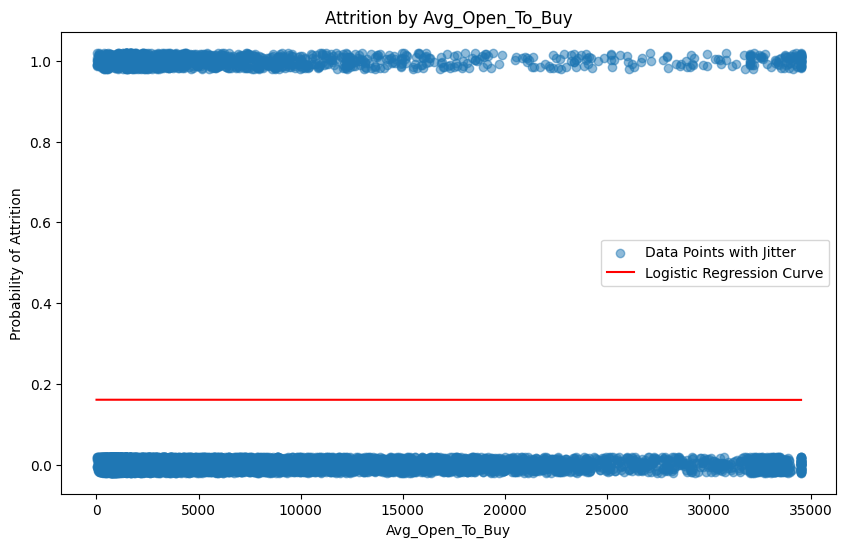

In [22]:
num_cols_by_pvalue_asc=['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Months_Inactive_12_mon', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1', 'Credit_Limit', 'Dependent_count', 'Customer_Age', 'Months_on_book', 'Avg_Open_To_Buy']

# Initialize logistic regression model
model = LogisticRegression()

for col in num_cols_by_pvalue_asc:
    X = df[[col]] # Use double brackets to get a DataFrame shape
    y = df['Attrition_Flag_binary']
    model.fit(X, y)
    
    # Create jitter for y
    jitter_y = 0.02  # Small jitter since y is binary
    y_jittered = y + np.random.uniform(-jitter_y, jitter_y, size=y.shape)

    # Create a scatter plot with jittered y-values
    plt.figure(figsize=(10, 6))
    plt.scatter(X[col], y_jittered, alpha=0.5, label='Data Points with Jitter')

    # Generate a sequence of numbers from min to max for X
    x_values = np.linspace(df[col].min(), df[col].max(), 1000).reshape(-1, 1)

    # Predict probabilities
    y_proba = model.predict_proba(x_values)[:, 1]

    # Plot the logistic regression curve
    plt.plot(x_values, y_proba, color='red', label='Logistic Regression Curve')

    plt.title(f'Attrition by {col}')
    plt.xlabel(col)
    plt.ylabel('Probability of Attrition')
    plt.legend()
    plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


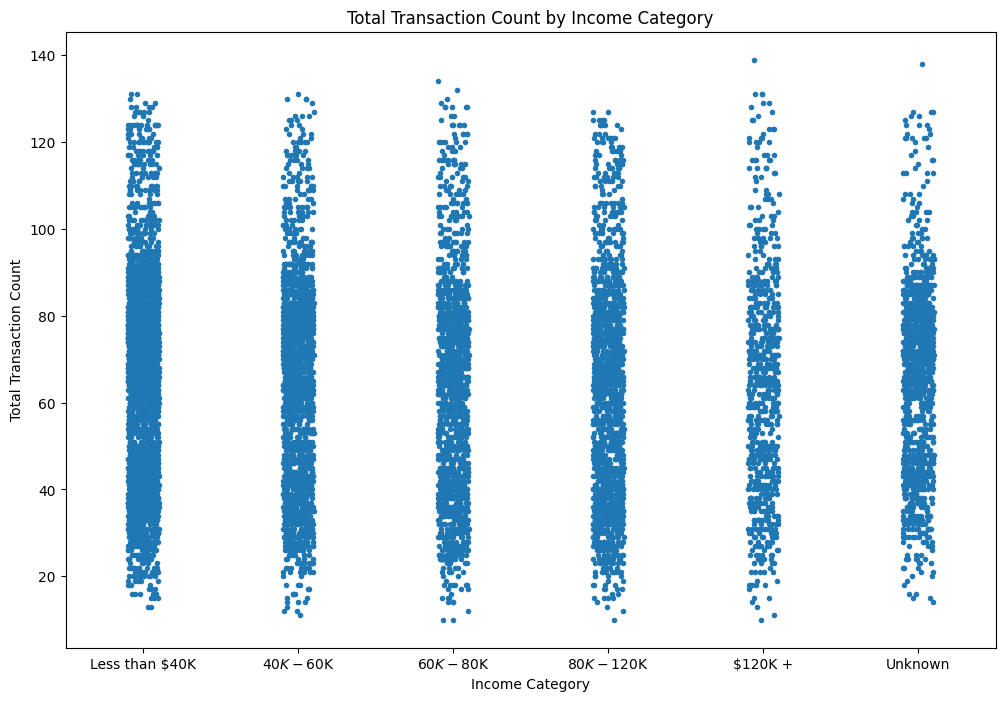

In [23]:
plt.figure(figsize=(12, 8))  # 그림 크기 설정
# Income_Category별로 Total_Trans_Ct의 scatter plot을 그립니다. jitter는 점들이 겹치는 것을 방지합니다.
sns.stripplot(x='Income_Category', y='Total_Trans_Ct', data=df, jitter=0.1, size=4, order=order_dict['Income_Category'])

plt.title('Total Transaction Count by Income Category')  # 그래프 제목
plt.xlabel('Income Category')  # x축 레이블
plt.ylabel('Total Transaction Count')  # y축 레이블
plt.show()  # 그래프 보여주기

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


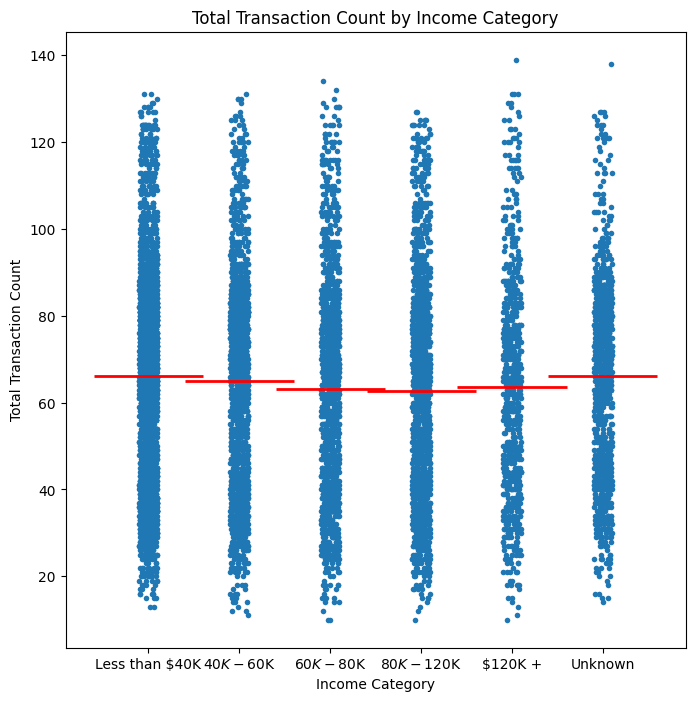

In [24]:
plt.figure(figsize=(8, 8))
sns.stripplot(x='Income_Category', y='Total_Trans_Ct', data=df, jitter=0.1, size=4, order=order_dict['Income_Category'])

# Calculate means
means = df.groupby('Income_Category')['Total_Trans_Ct'].mean().reindex(order_dict['Income_Category'])

# Plot means
for i, mean in enumerate(means):
    plt.hlines(mean, i - 0.6, i + 0.6, color='red', lw=2, zorder=3)

plt.title('Total Transaction Count by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Total Transaction Count')    
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

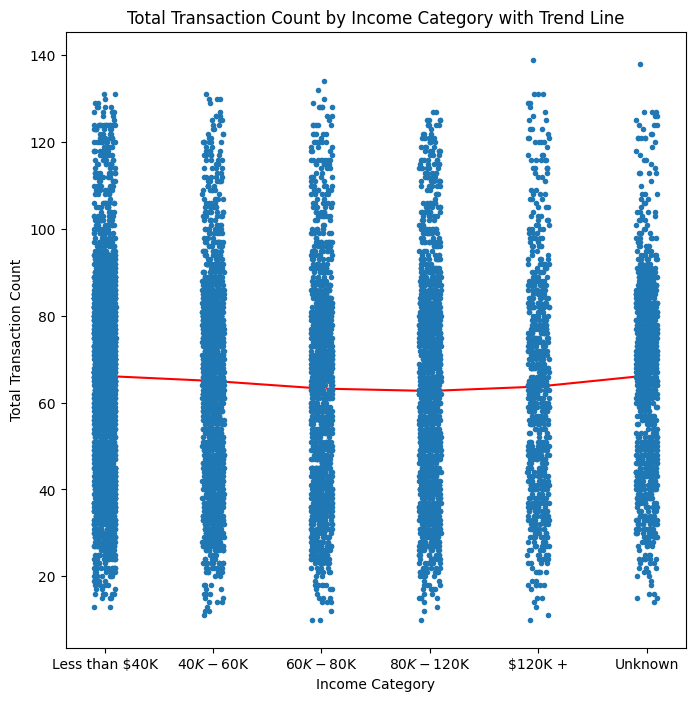

In [25]:
plt.figure(figsize=(8,8))

# Plot the scatter plot with jitter
sns.stripplot(x='Income_Category', y='Total_Trans_Ct', data=df, jitter=0.1, size=4, order=order_dict['Income_Category'])

# Calculate the mean Total_Trans_Ct for each Income_Category and store it in a new DataFrame
mean_values_df = df.groupby('Income_Category')['Total_Trans_Ct'].mean().reindex(order_dict['Income_Category']).reset_index()

# Plot the line chart that connects the mean points
sns.lineplot(x='Income_Category', y='Total_Trans_Ct', data=mean_values_df, marker='o', sort=False, color='red')

plt.title('Total Transaction Count by Income Category with Trend Line')
plt.xlabel('Income Category')
plt.ylabel('Total Transaction Count')
# plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


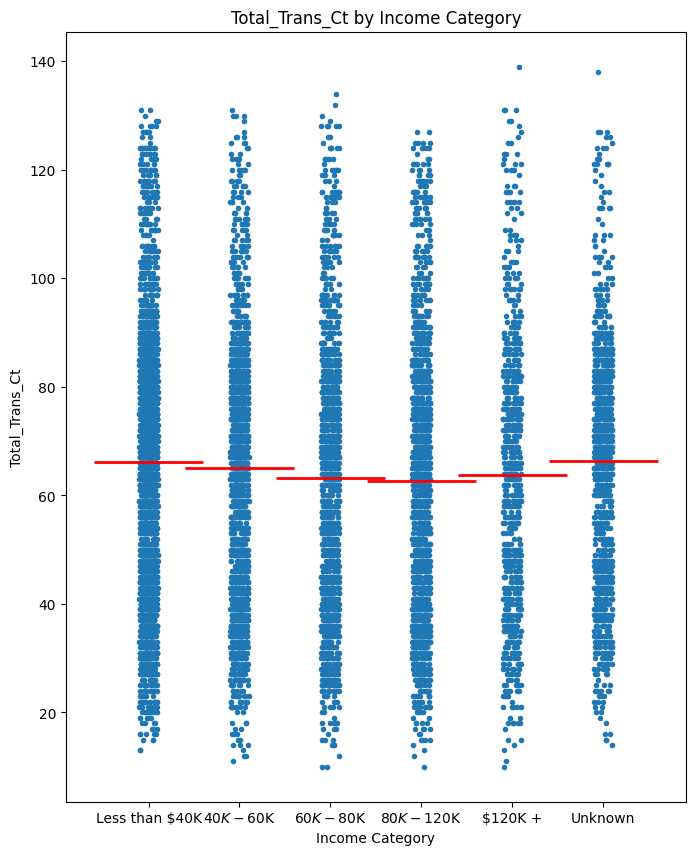

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


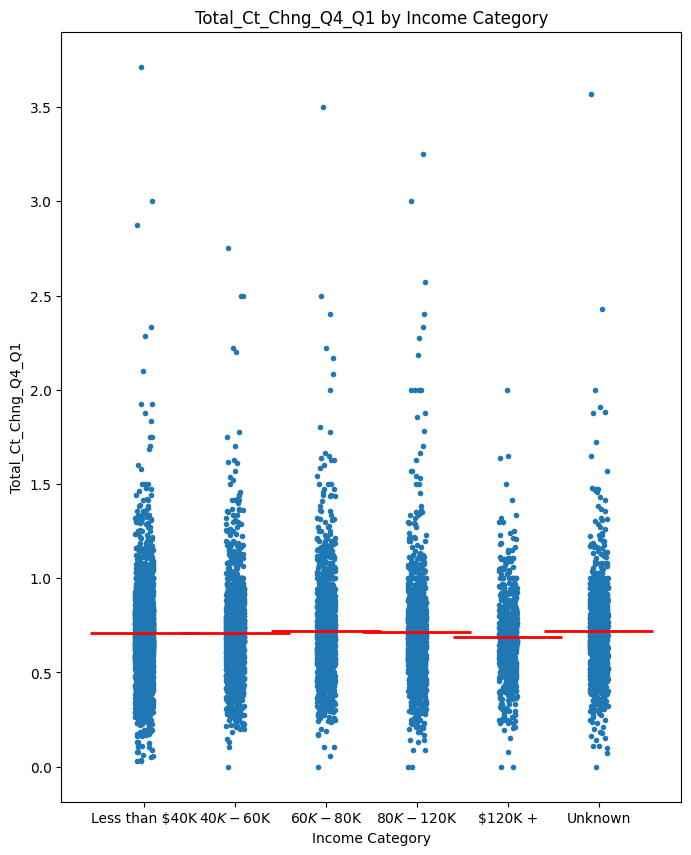

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


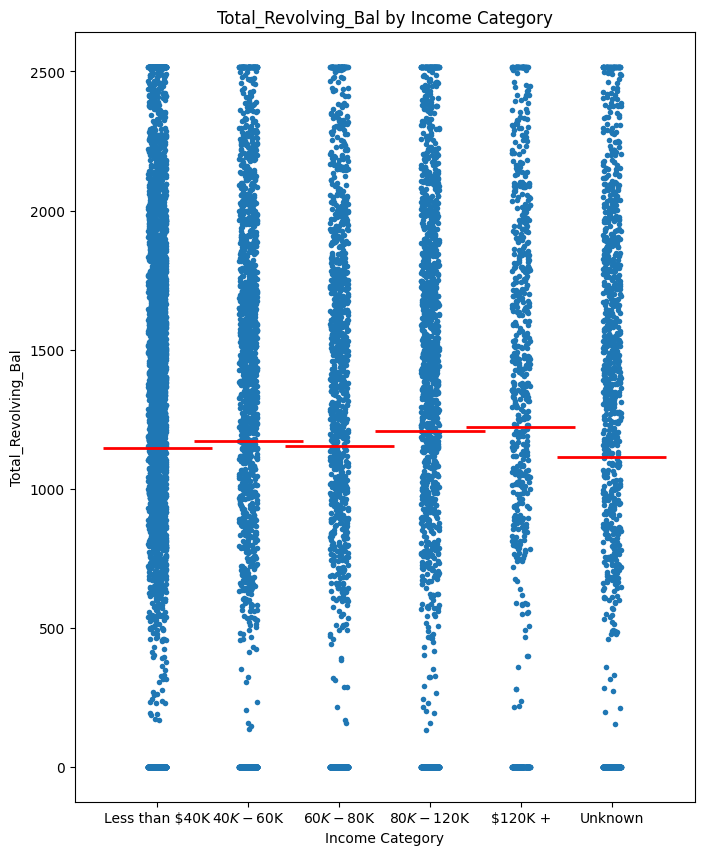

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


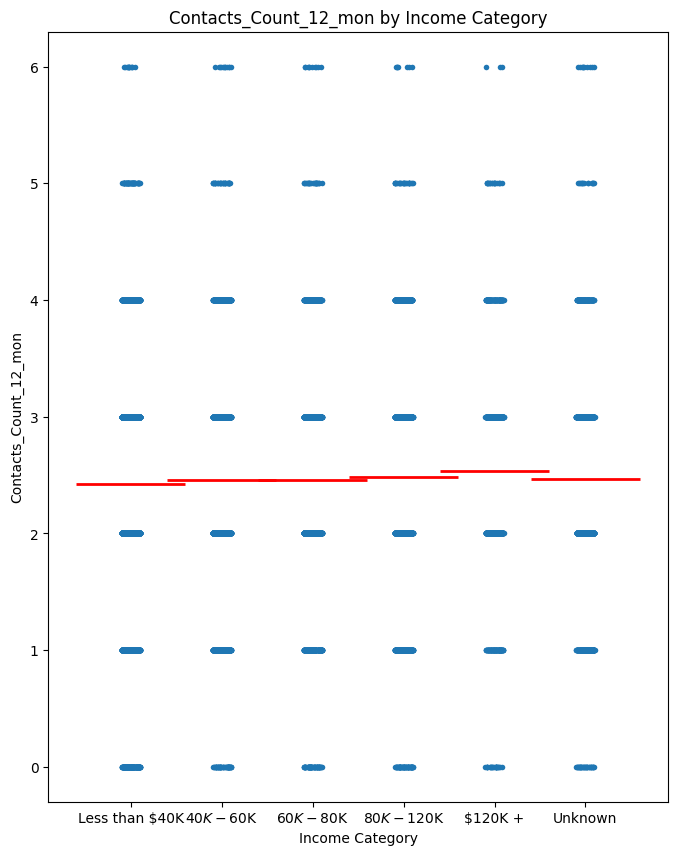

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


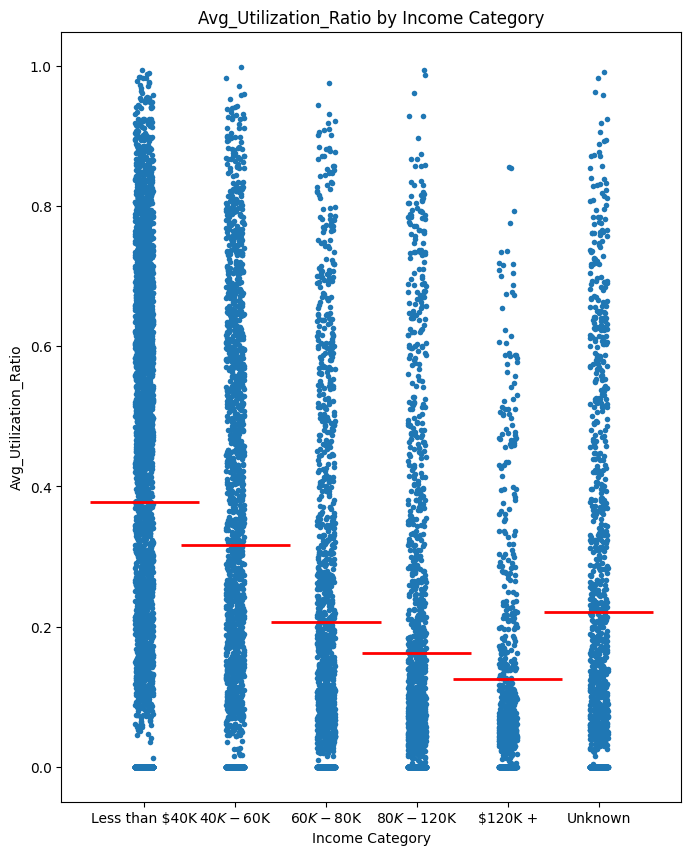

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


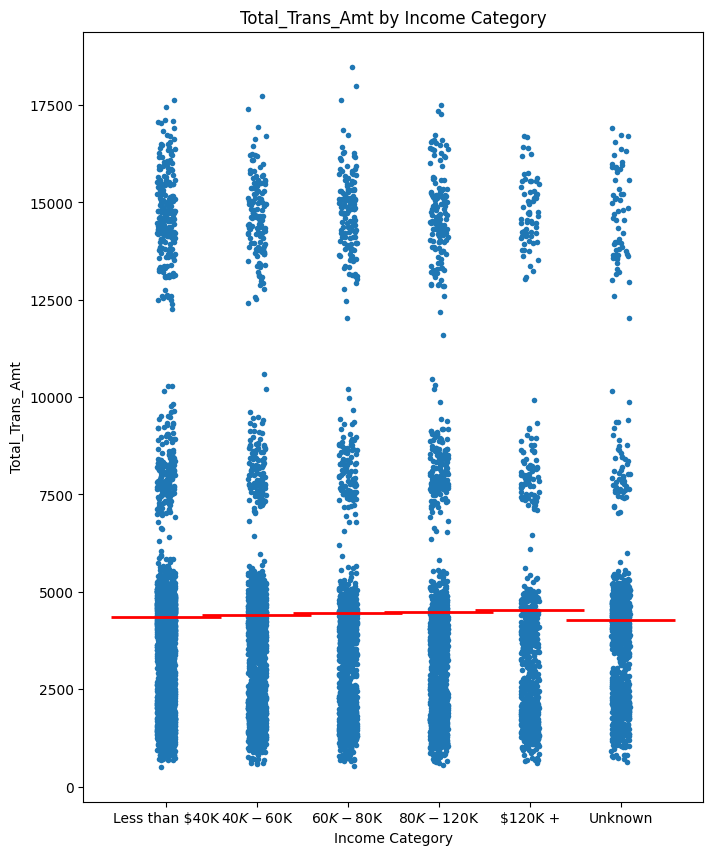

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


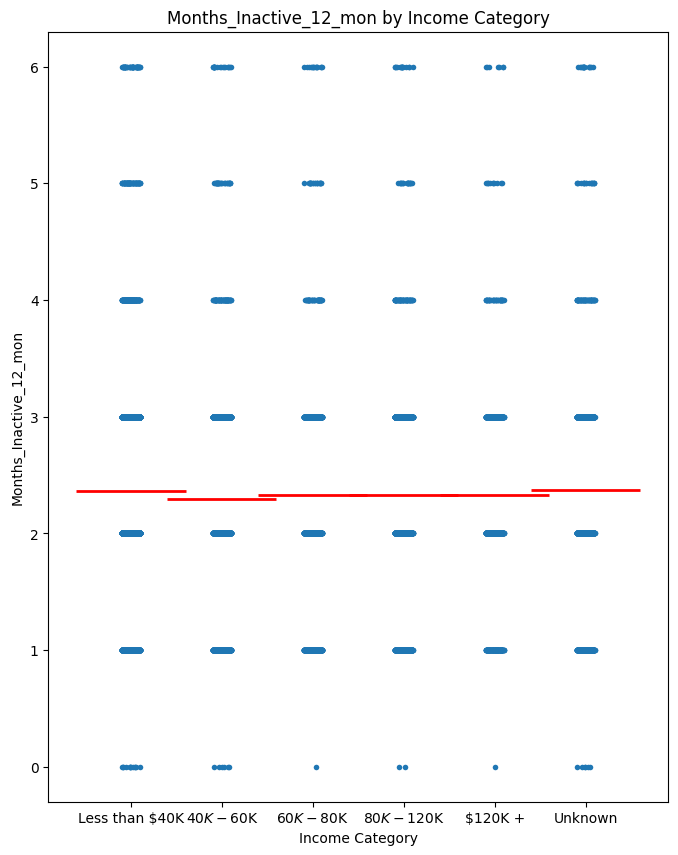

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


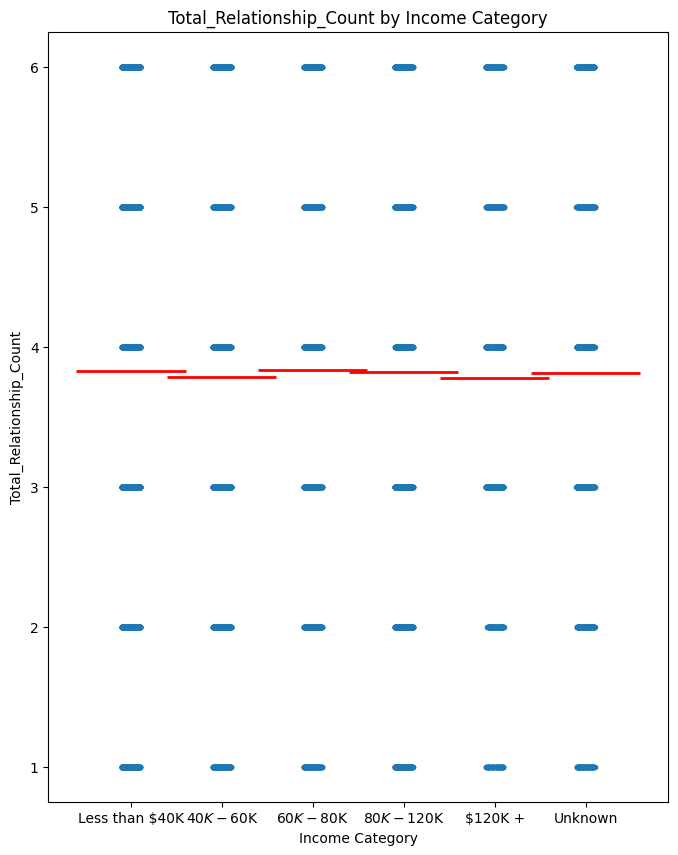

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


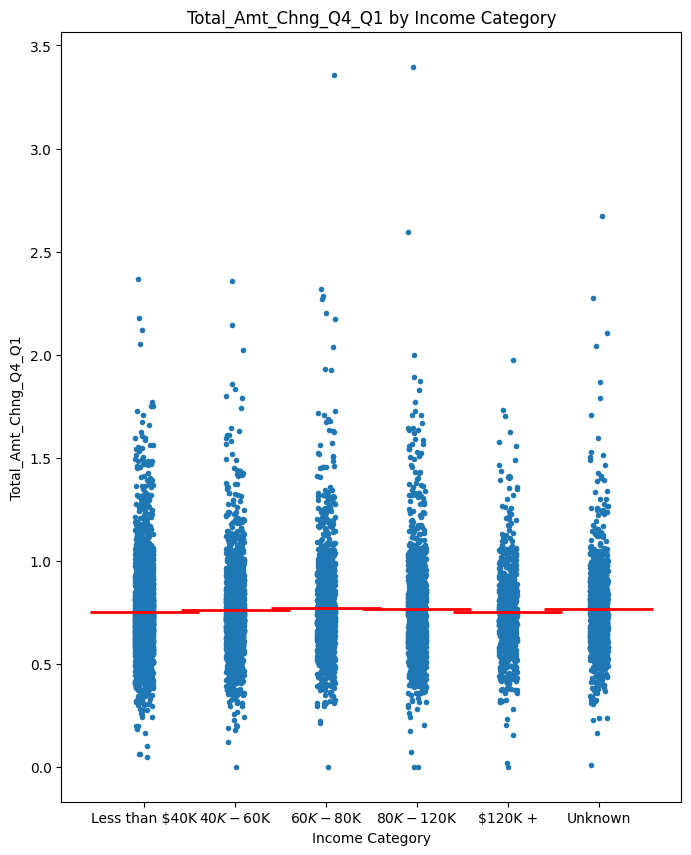

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


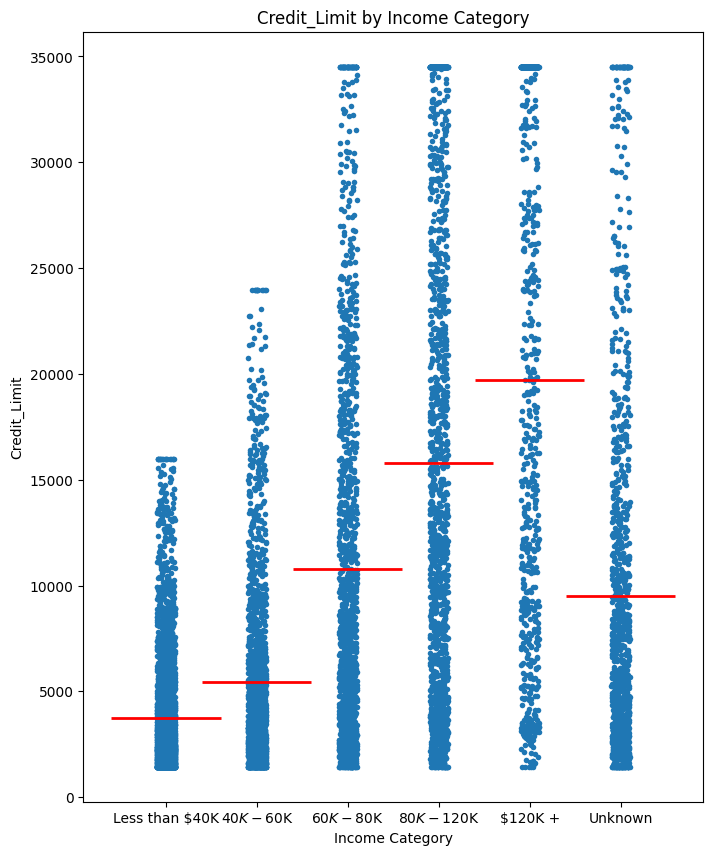

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


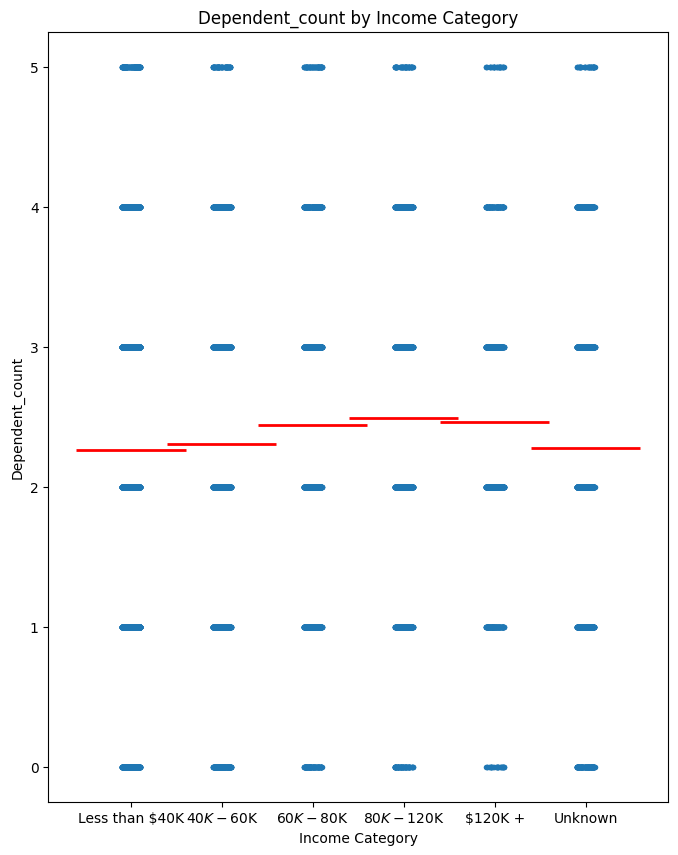

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


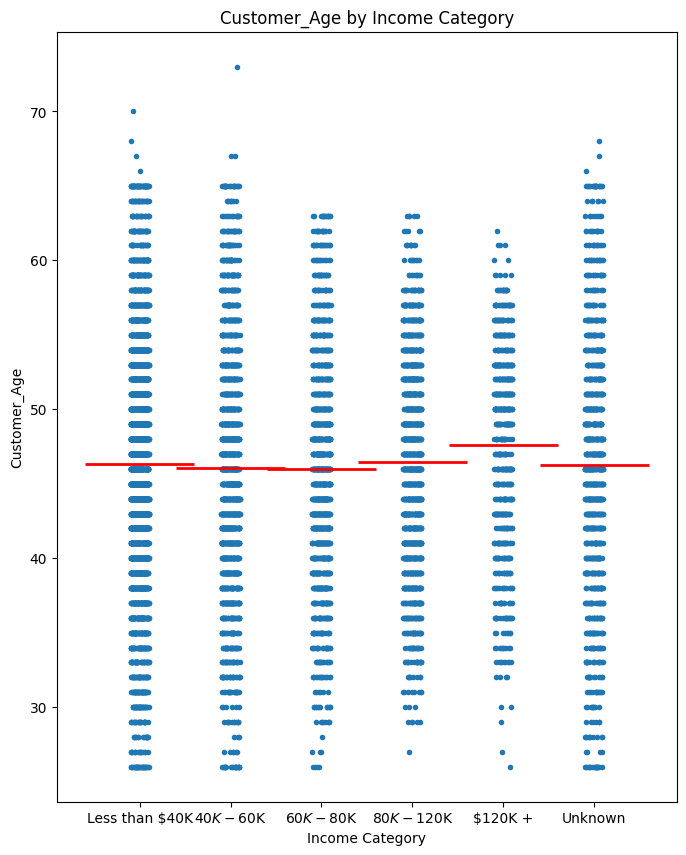

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


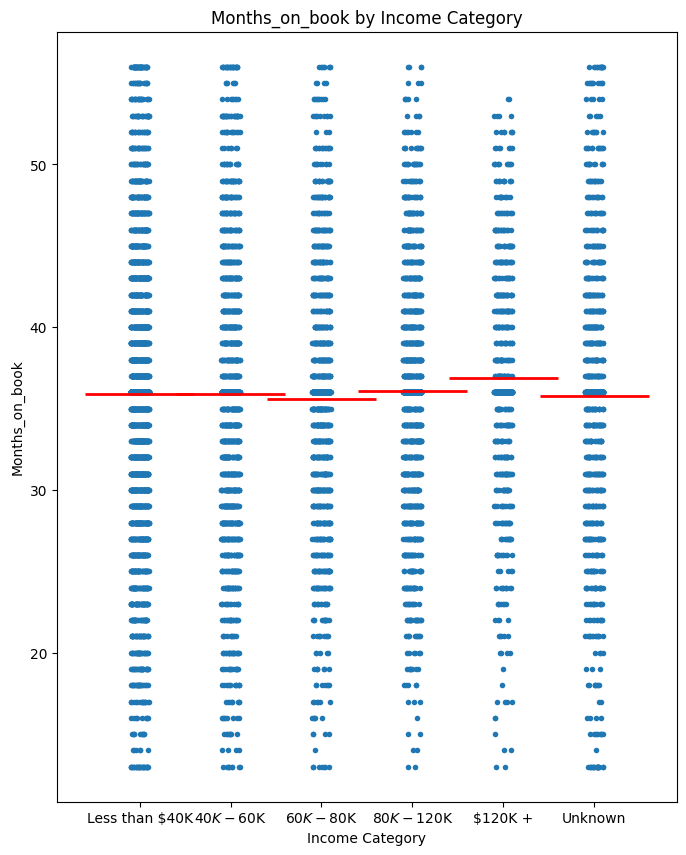

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


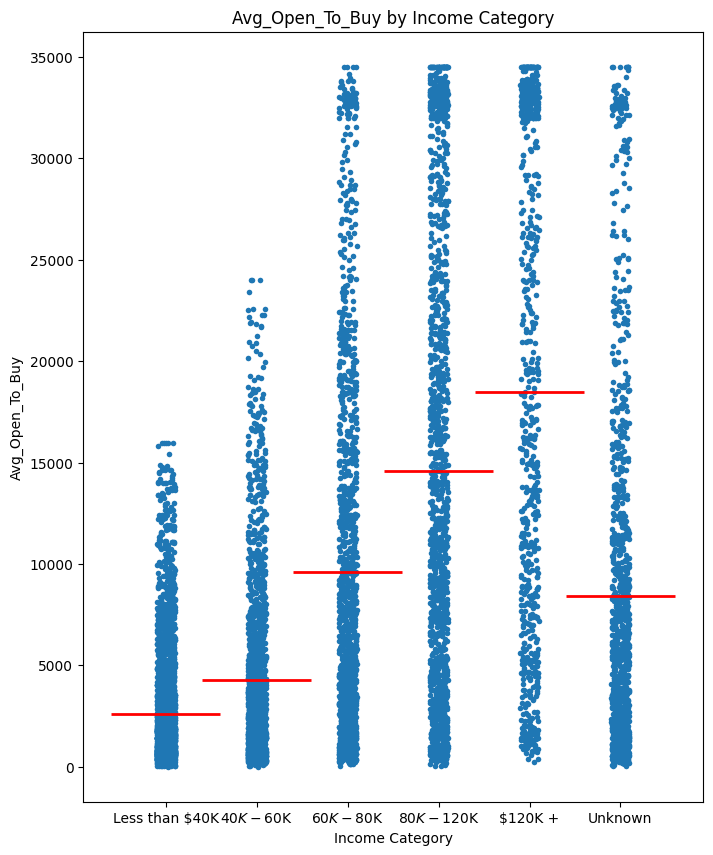

In [26]:
for col in num_cols_by_pvalue_asc:
    plt.figure(figsize=(8, 10))
    sns.stripplot(x='Income_Category', y=col, data=df, jitter=0.1, size=4, order=order_dict['Income_Category'])

    # Calculate means
    means = df.groupby('Income_Category')[col].mean().reindex(order_dict['Income_Category'])

    # Plot means
    for i, mean in enumerate(means):
        plt.hlines(mean, i - 0.6, i + 0.6, color='red', lw=2, zorder=3)

    plt.title(f'{col} by Income Category')
    plt.xlabel('Income Category')
    plt.ylabel(col)    
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


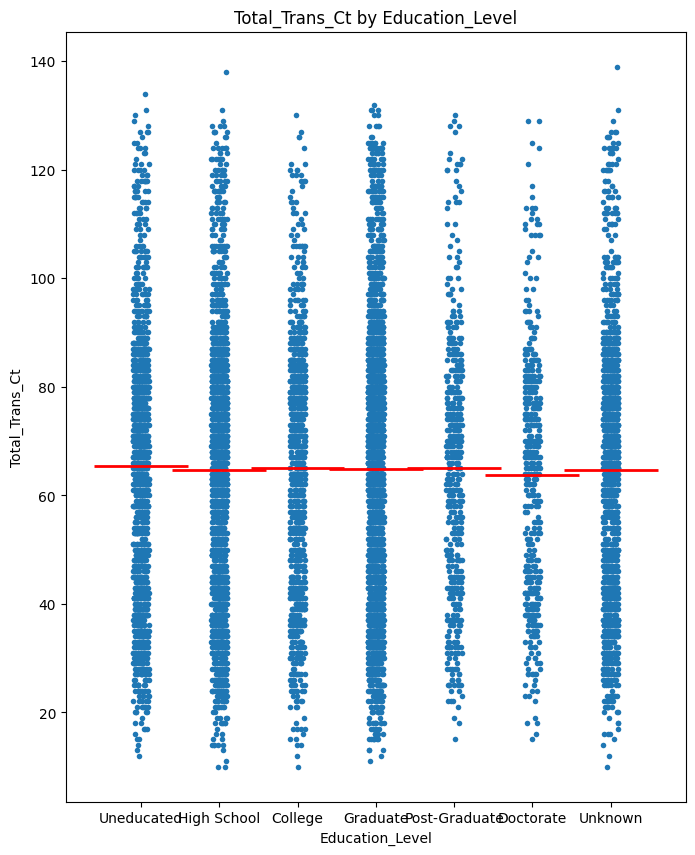

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


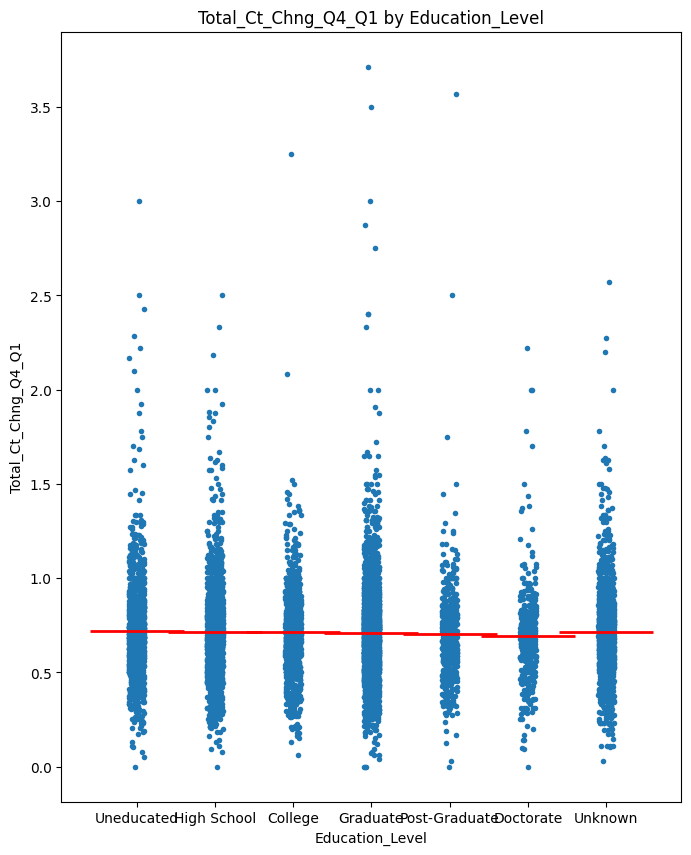

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


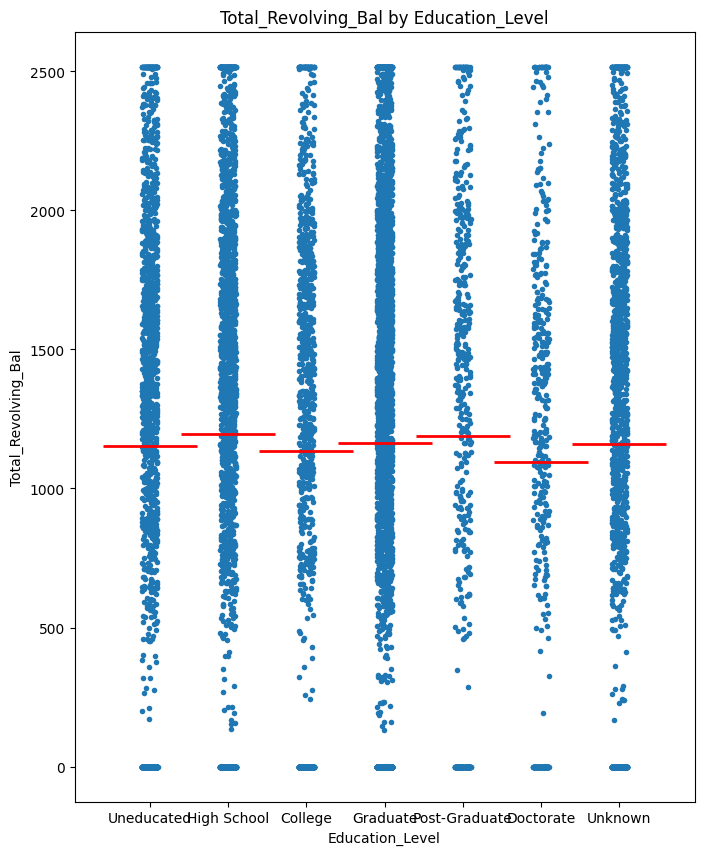

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


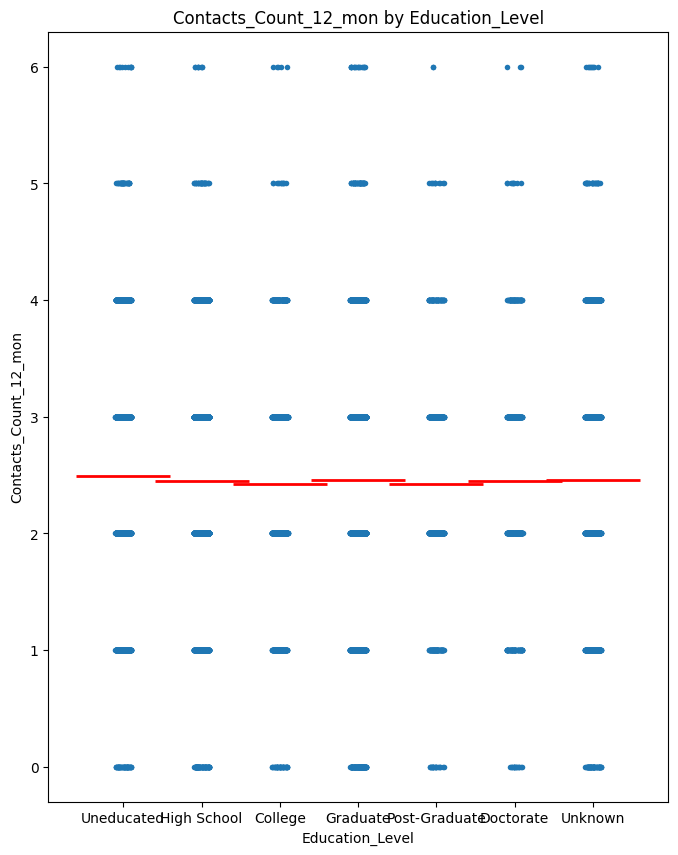

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


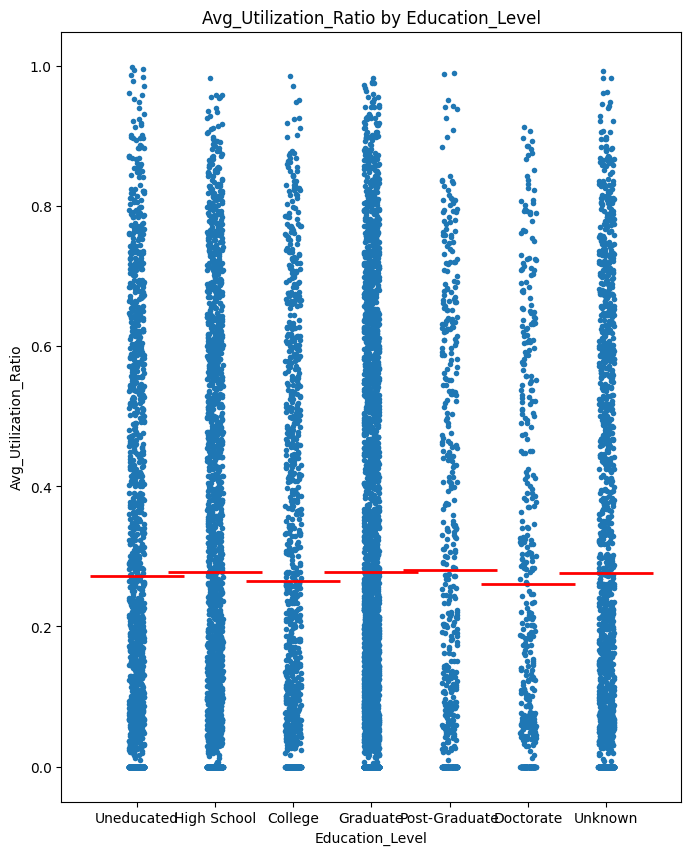

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


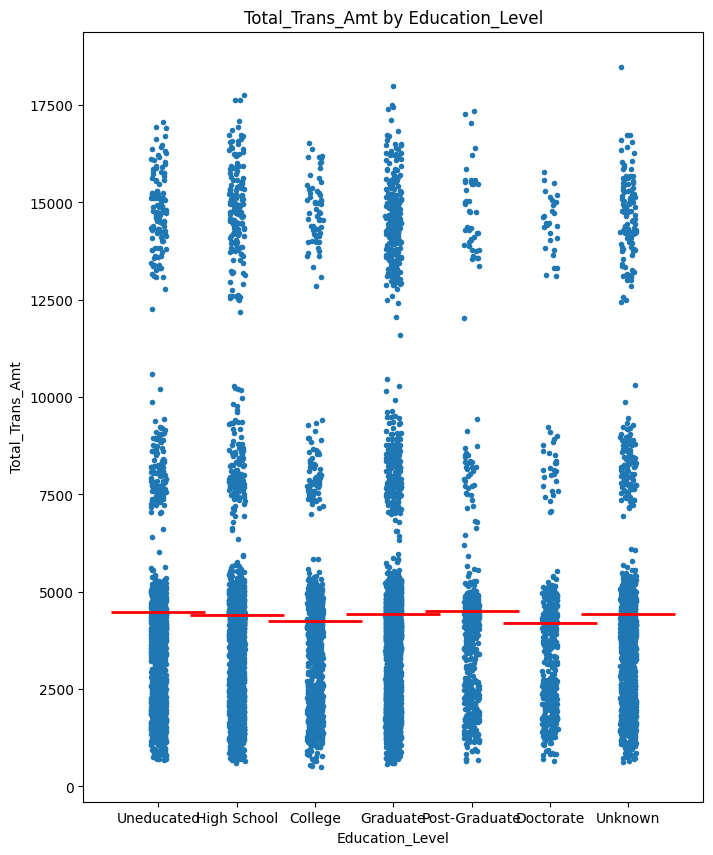

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


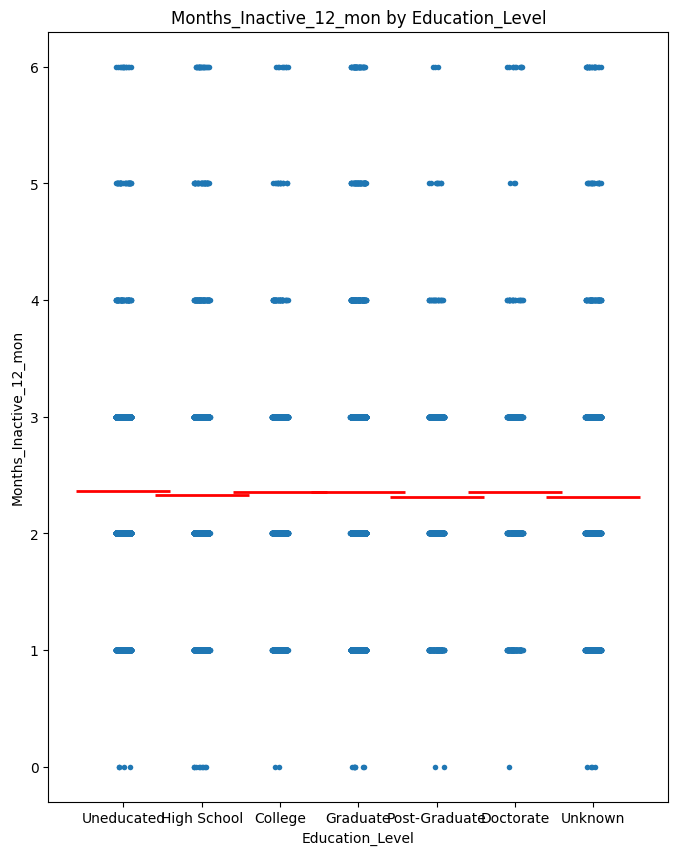

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


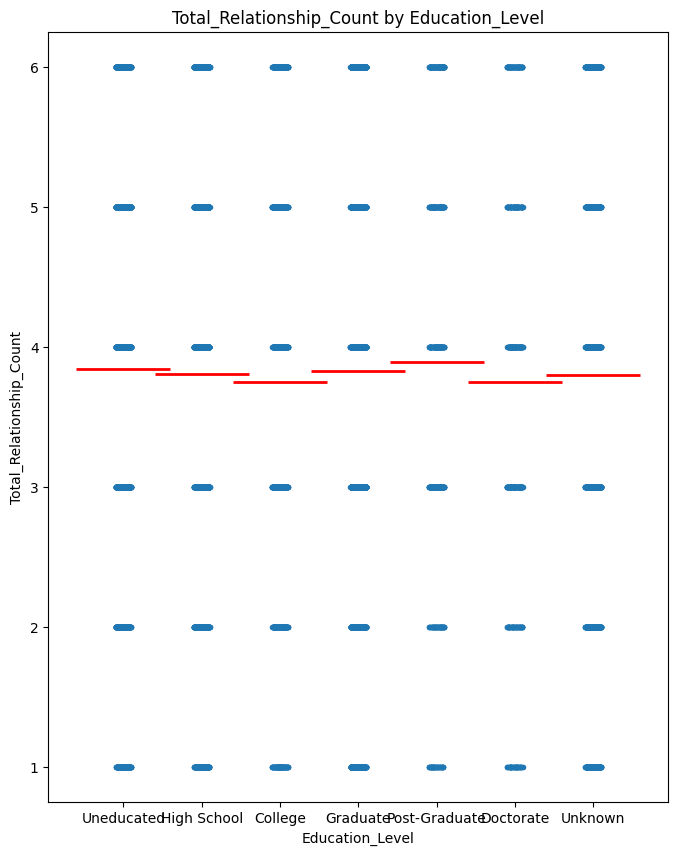

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


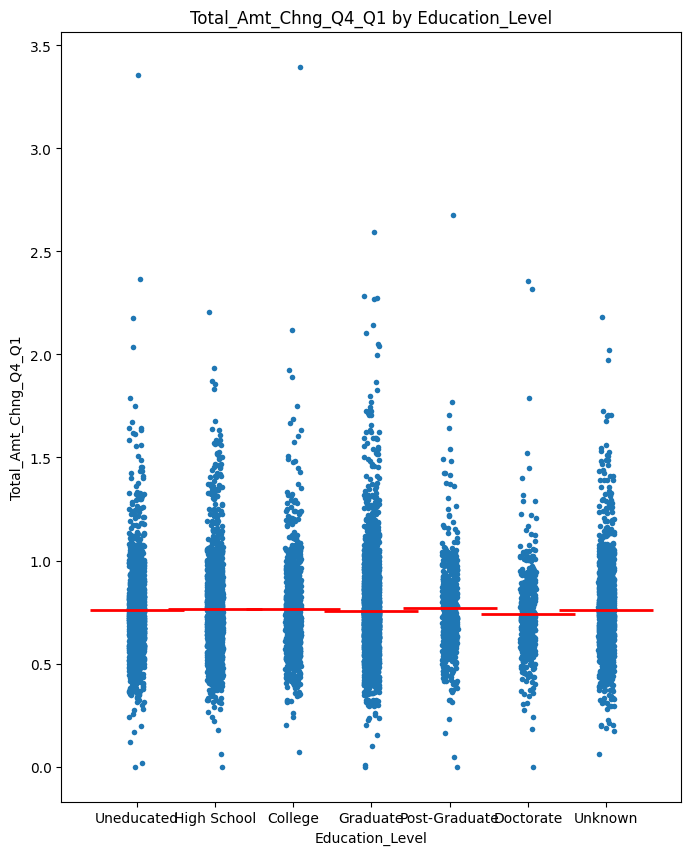

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


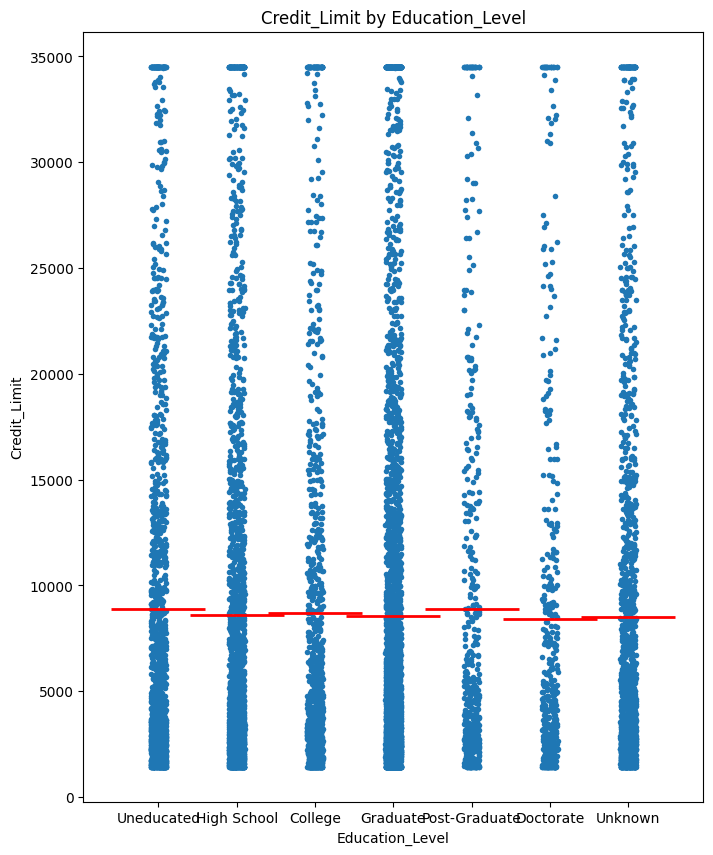

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


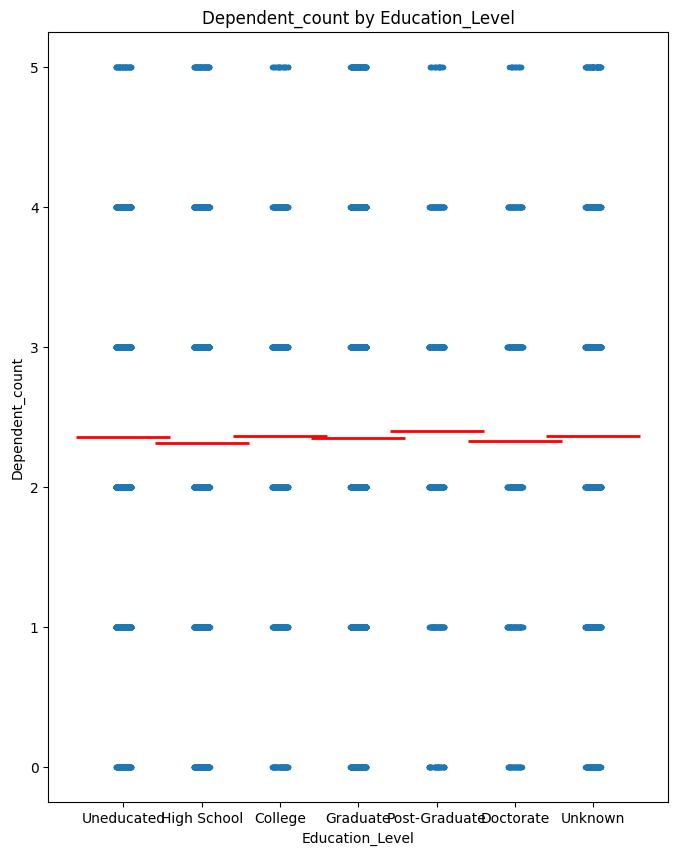

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


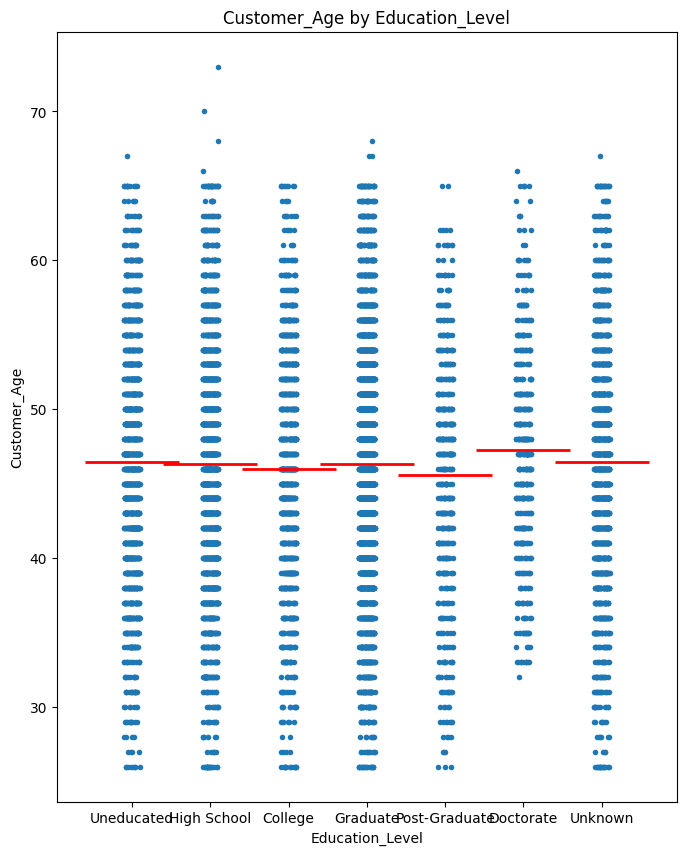

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


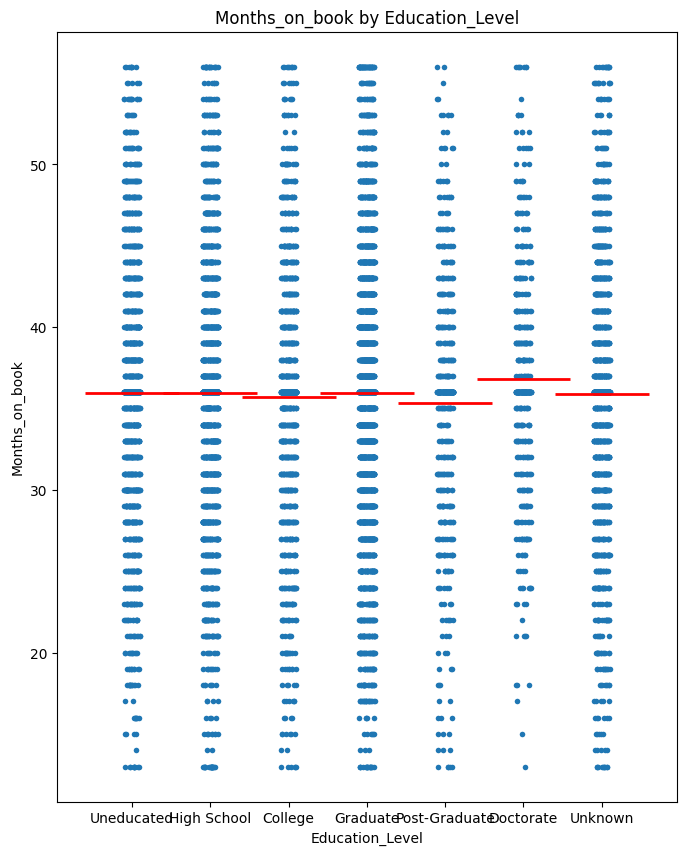

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


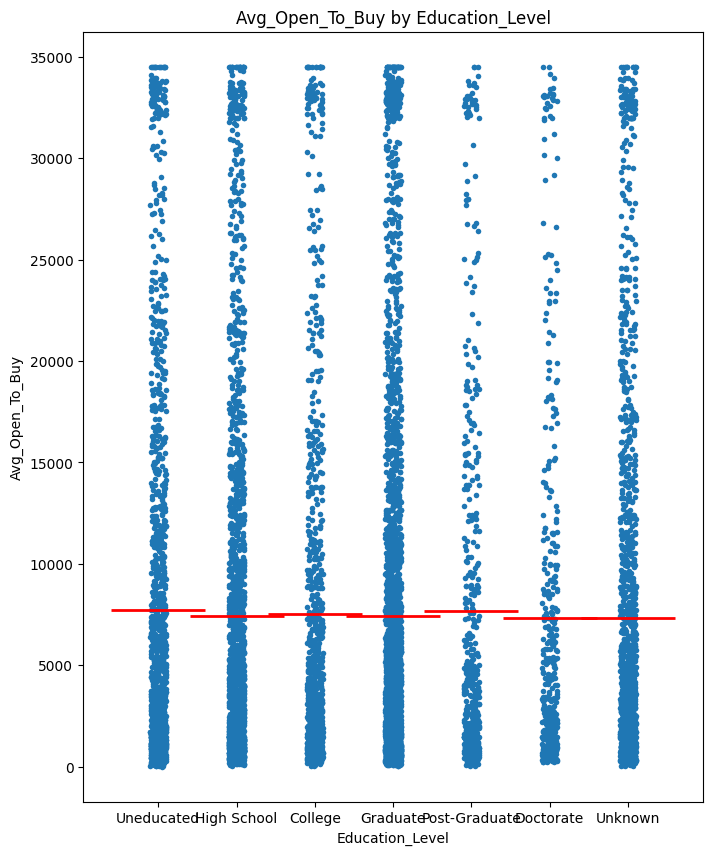

In [27]:
for col in num_cols_by_pvalue_asc:
    plt.figure(figsize=(8, 10))
    sns.stripplot(x='Education_Level', y=col, data=df, jitter=0.1, size=4, order=order_dict['Education_Level'])

    # Calculate means
    means = df.groupby('Education_Level')[col].mean().reindex(order_dict['Education_Level'])

    # Plot means
    for i, mean in enumerate(means):
        plt.hlines(mean, i - 0.6, i + 0.6, color='red', lw=2, zorder=3)

    plt.title(f'{col} by Education_Level')
    plt.xlabel('Education_Level')
    plt.ylabel(col)    
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


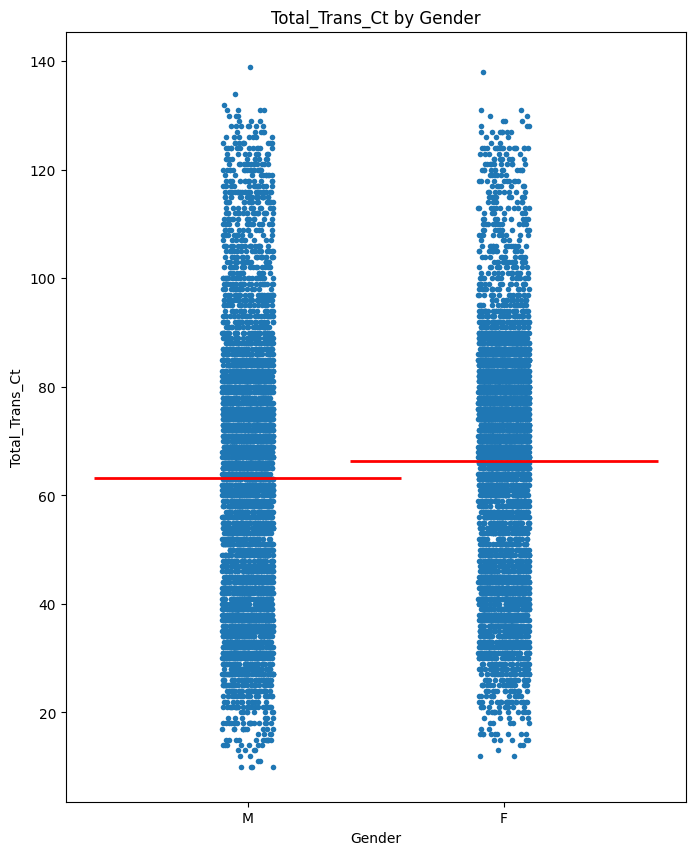

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


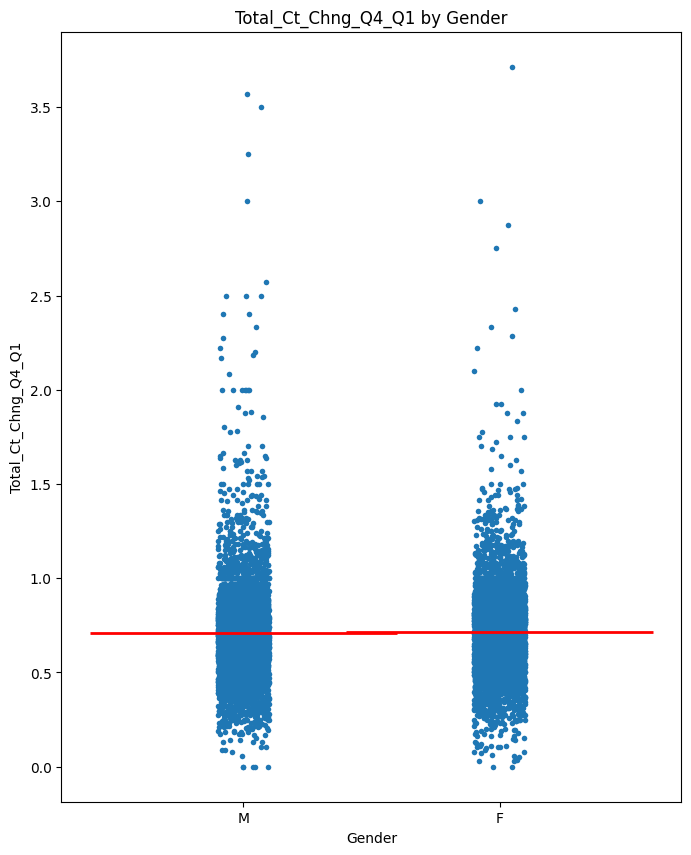

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


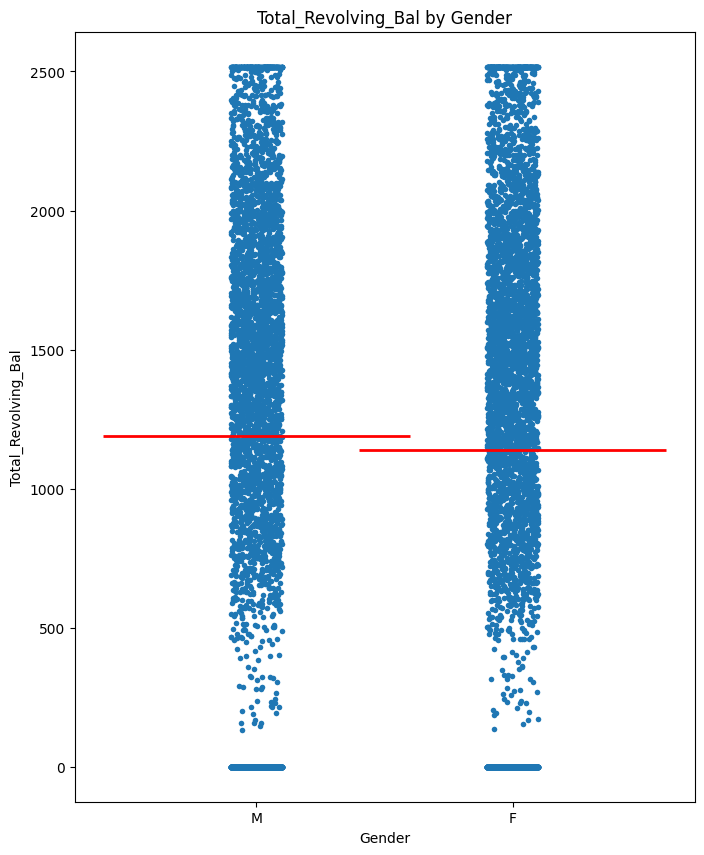

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


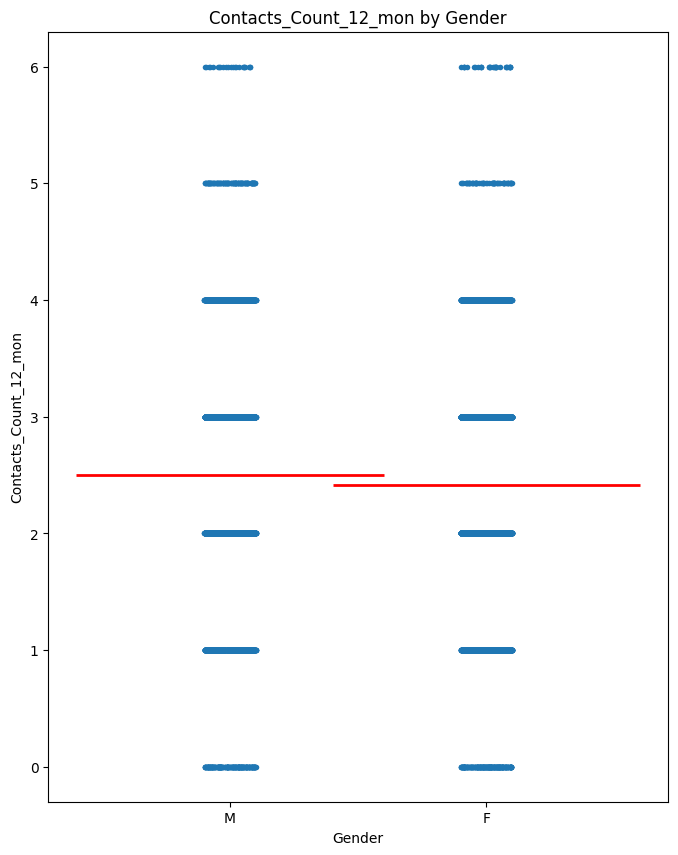

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


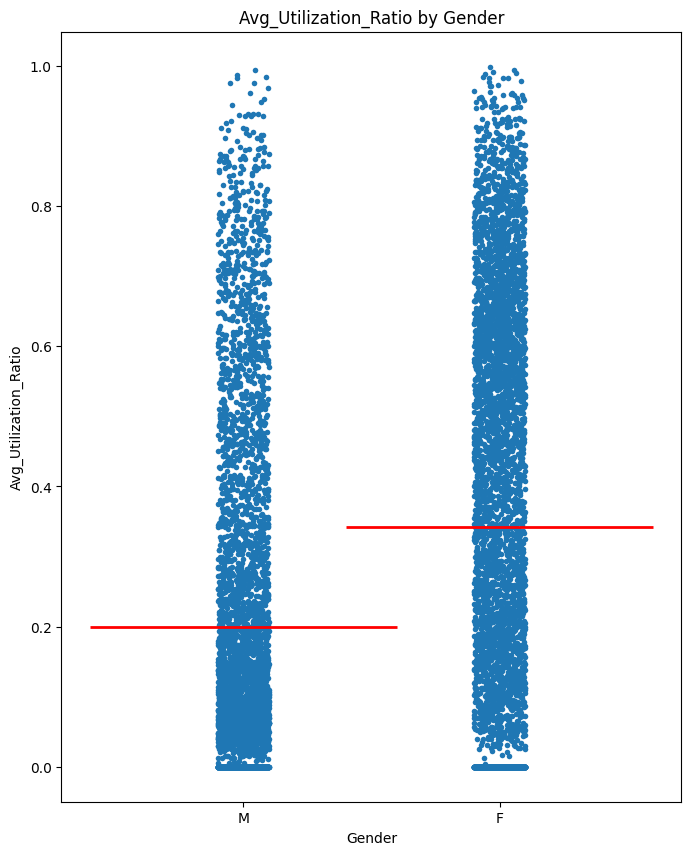

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


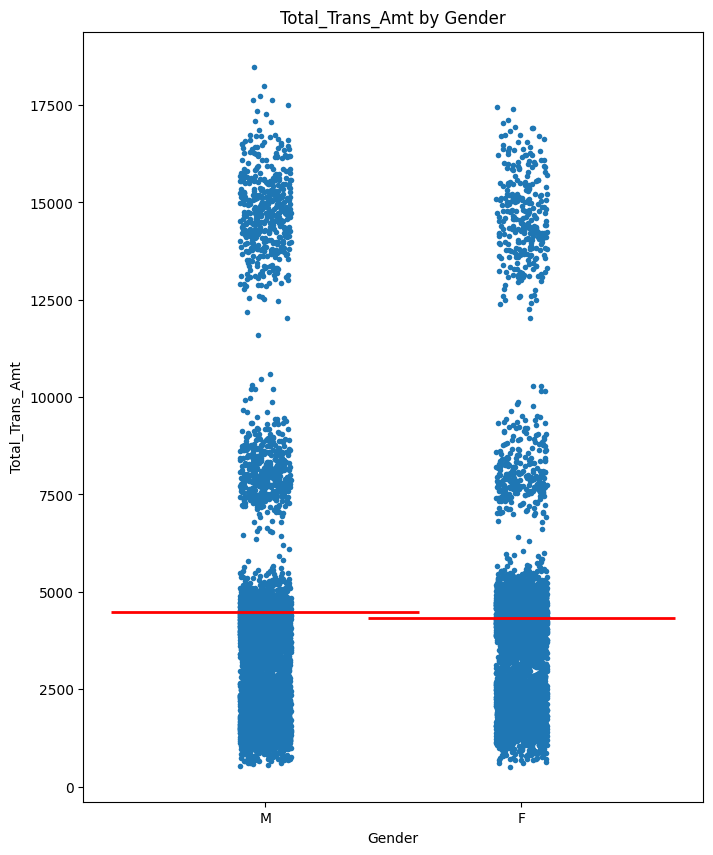

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


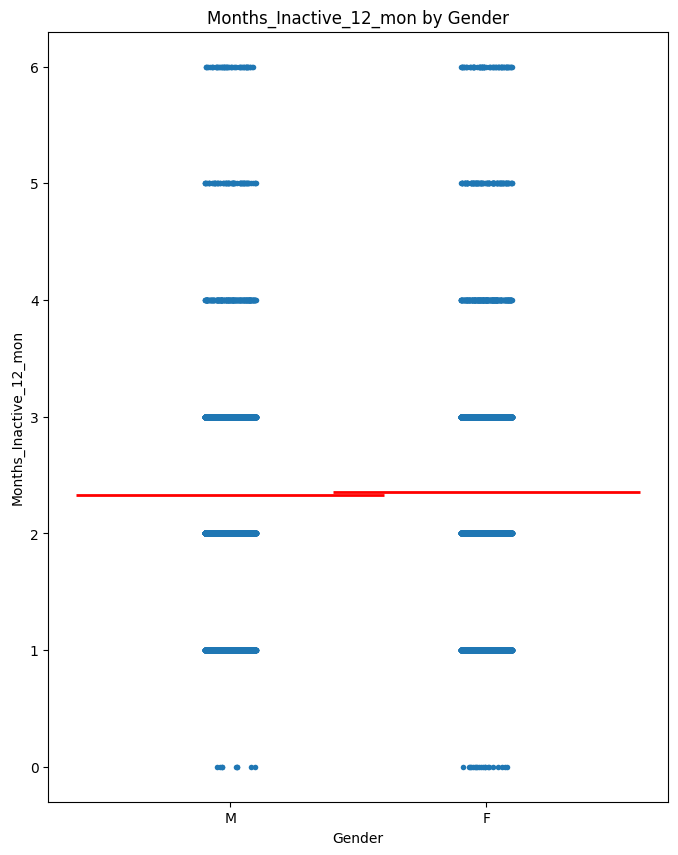

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


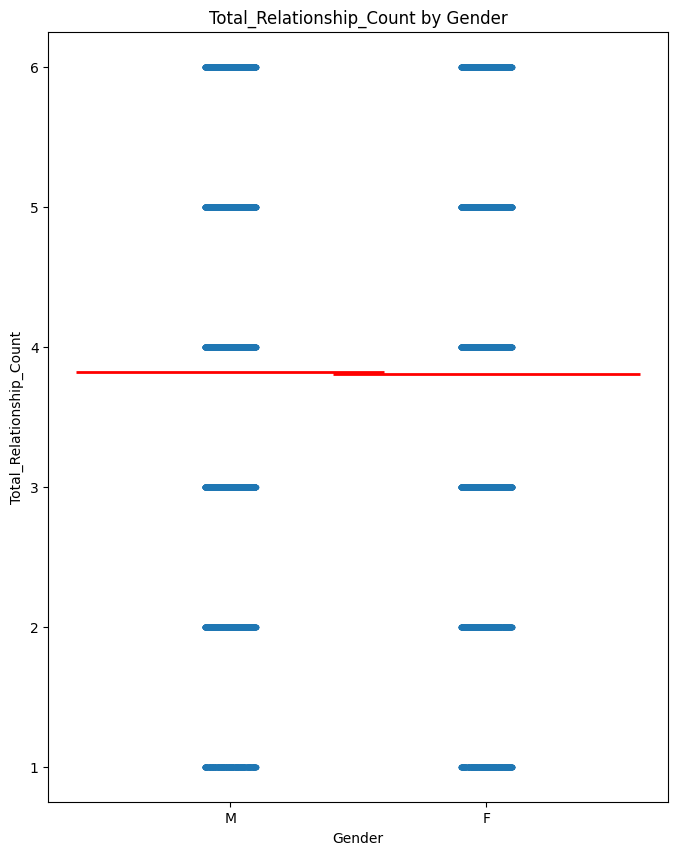

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


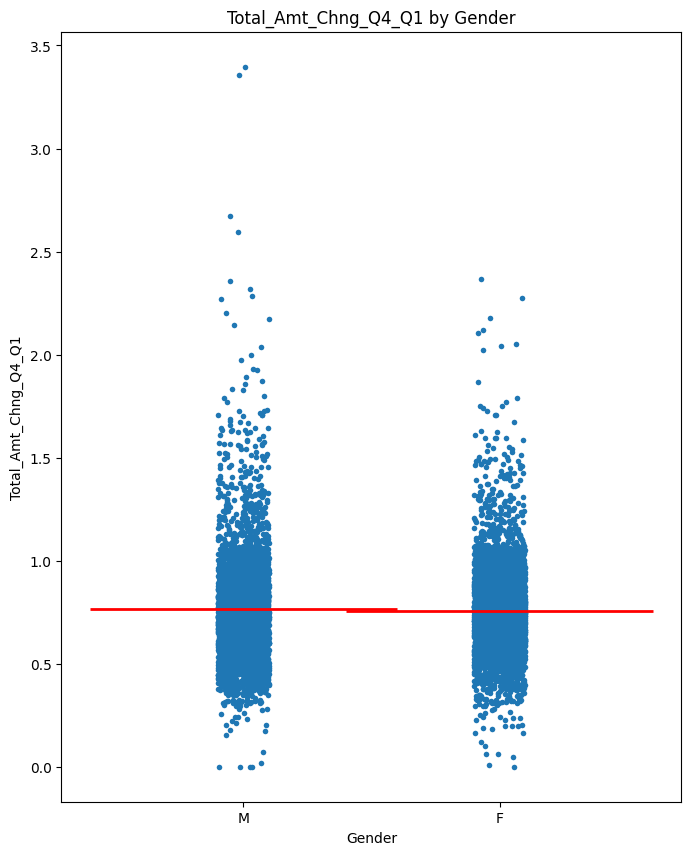

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


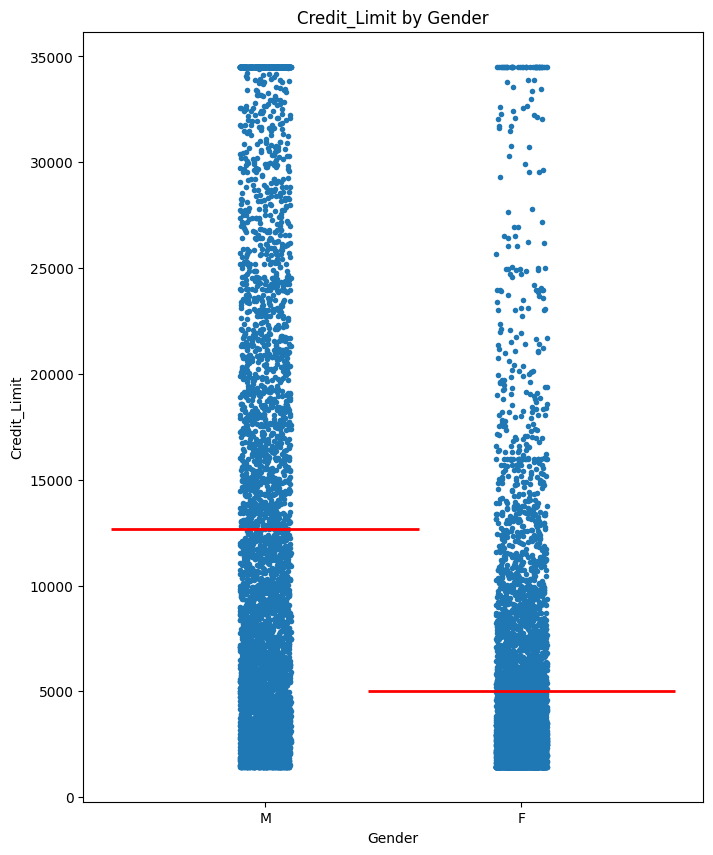

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


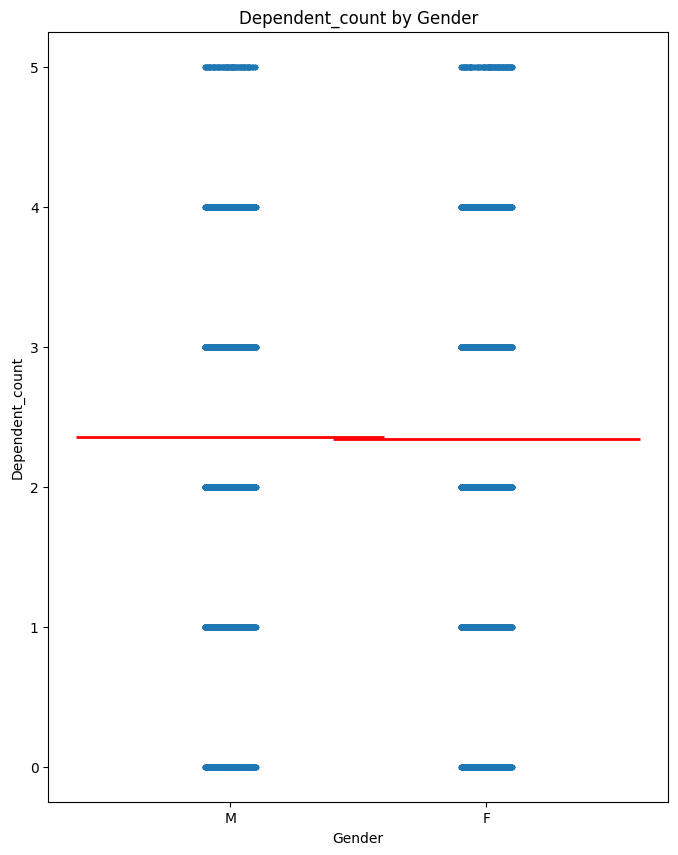

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


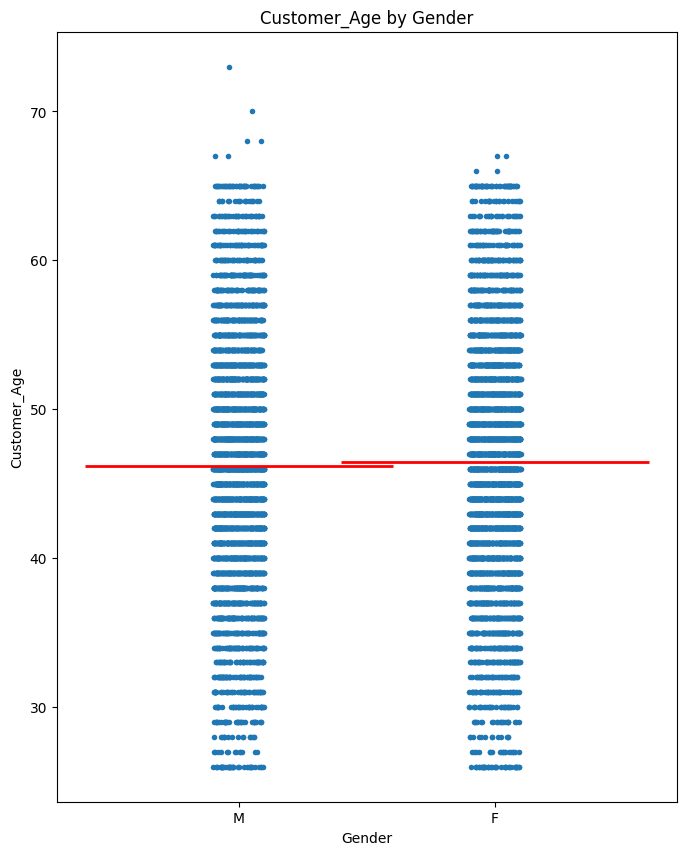

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


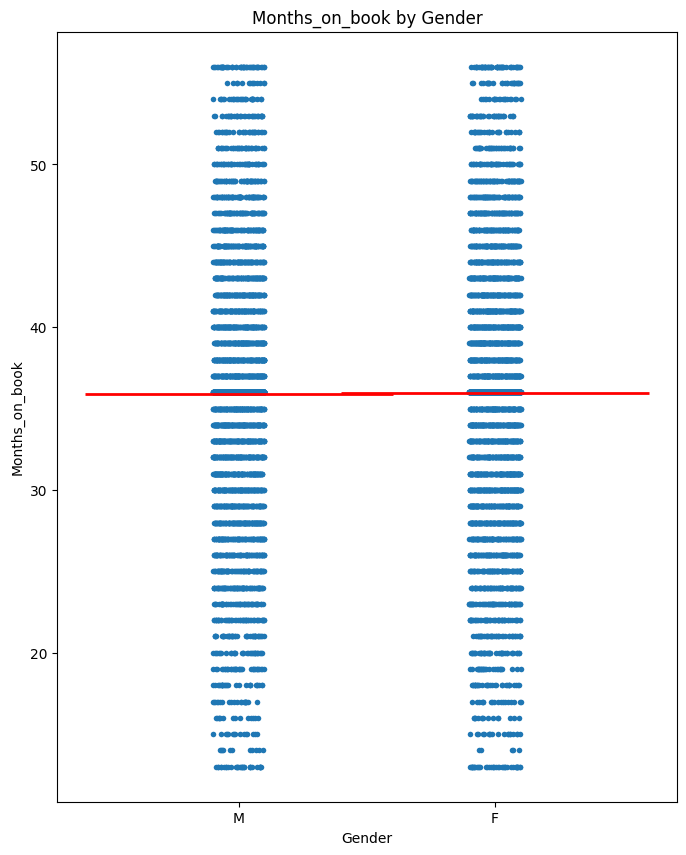

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


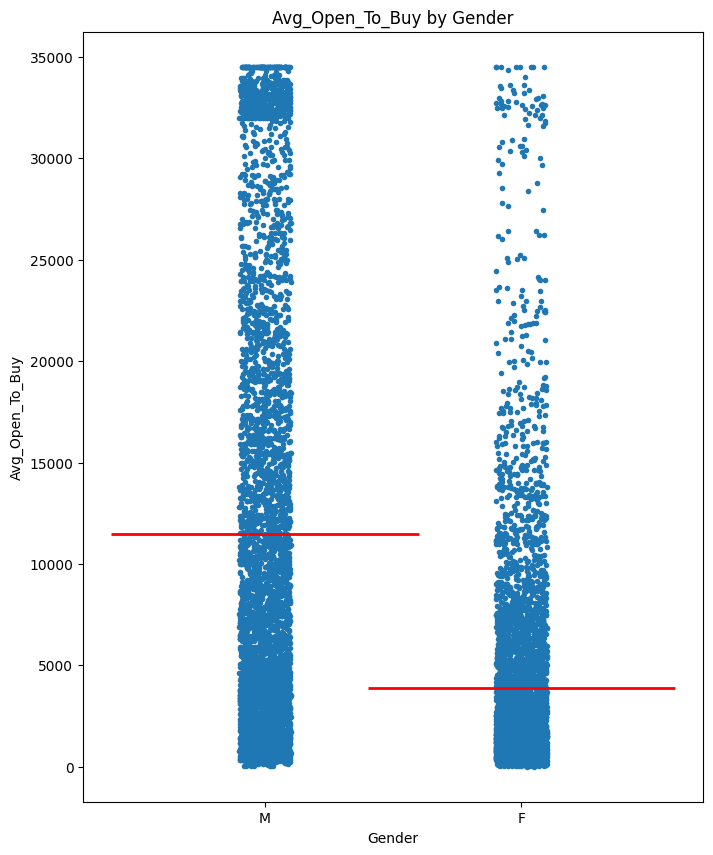

In [28]:
for col in num_cols_by_pvalue_asc:
    plt.figure(figsize=(8, 10))
    sns.stripplot(x='Gender', y=col, data=df, jitter=0.1, size=4, order=order_dict['Gender'])

    # Calculate means
    means = df.groupby('Gender')[col].mean().reindex(order_dict['Gender'])

    # Plot means
    for i, mean in enumerate(means):
        plt.hlines(mean, i - 0.6, i + 0.6, color='red', lw=2, zorder=3)

    plt.title(f'{col} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(col)    
    plt.show()

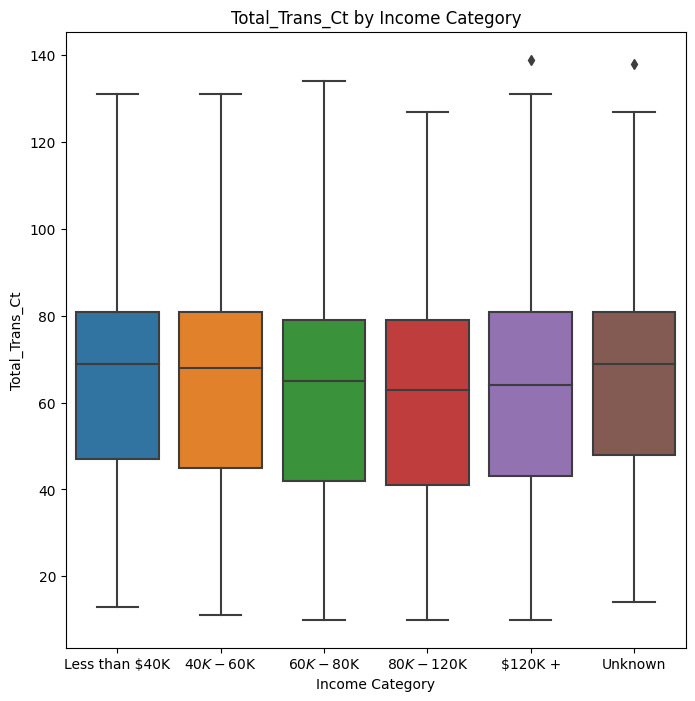

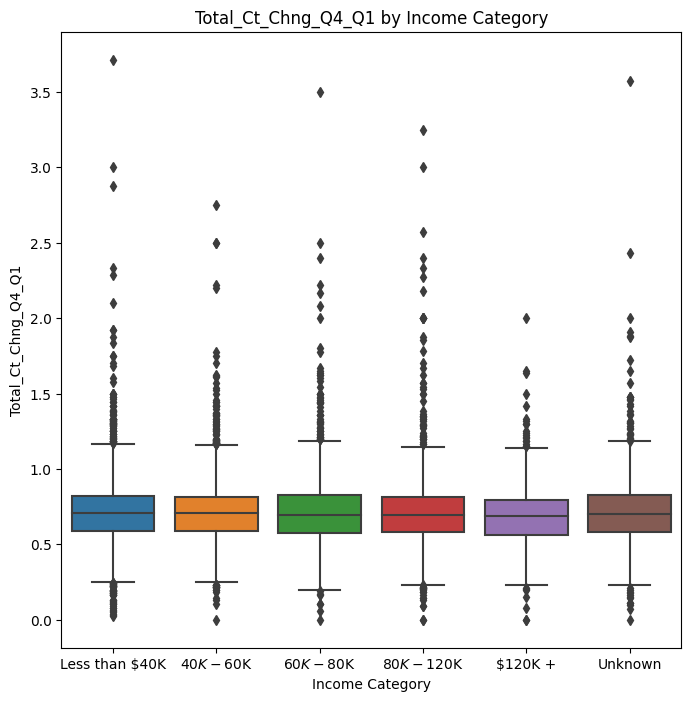

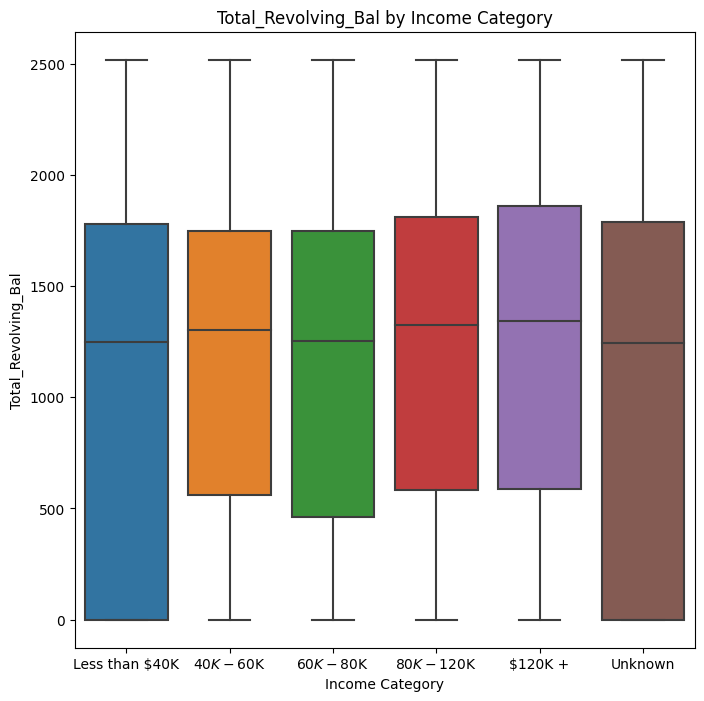

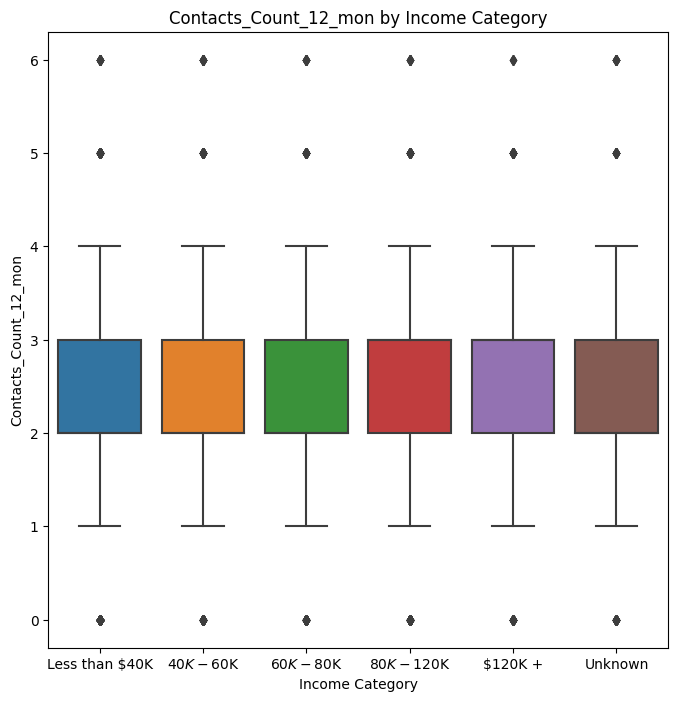

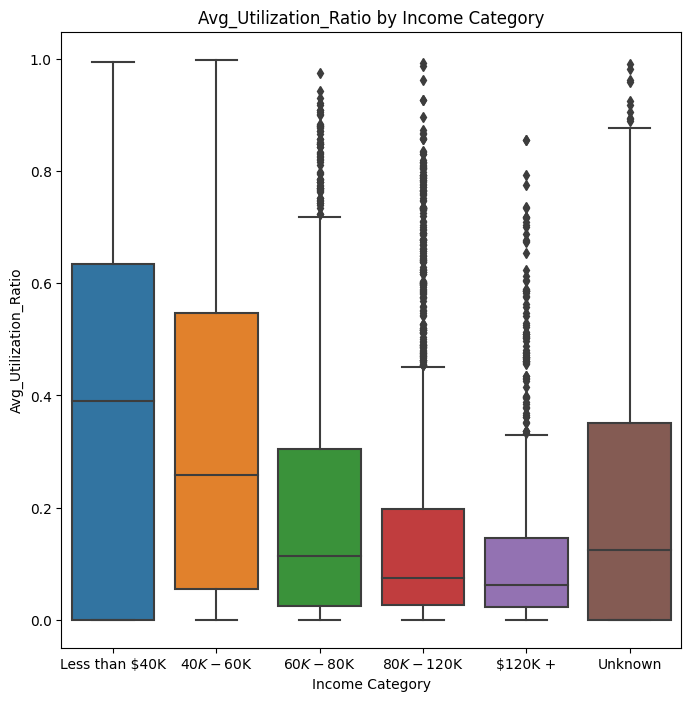

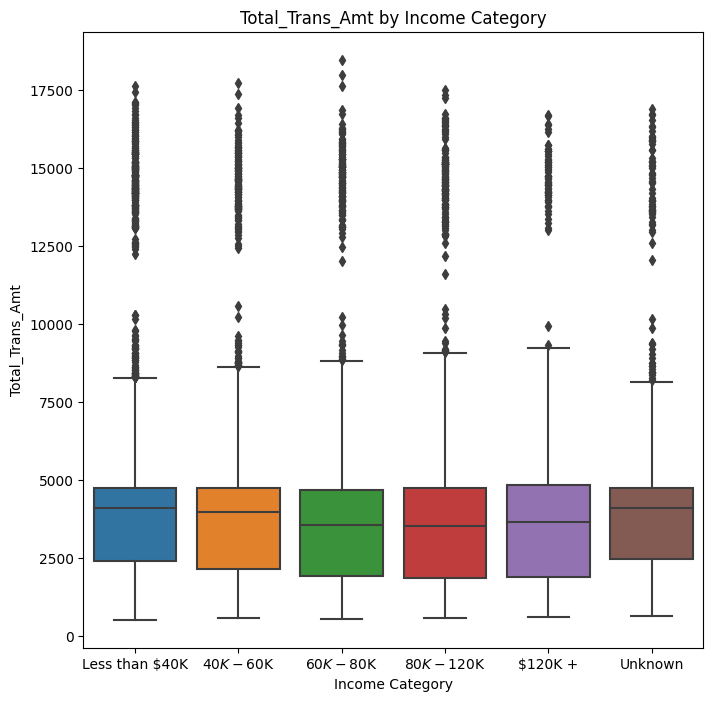

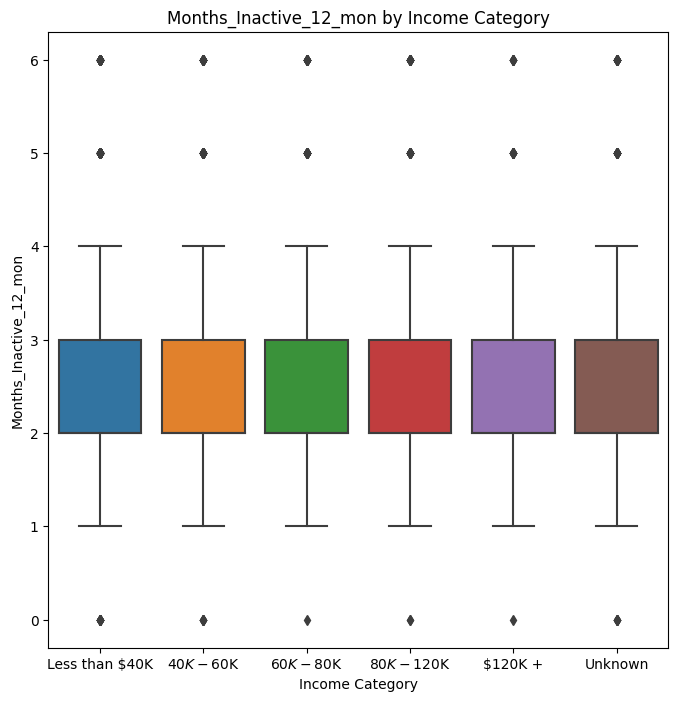

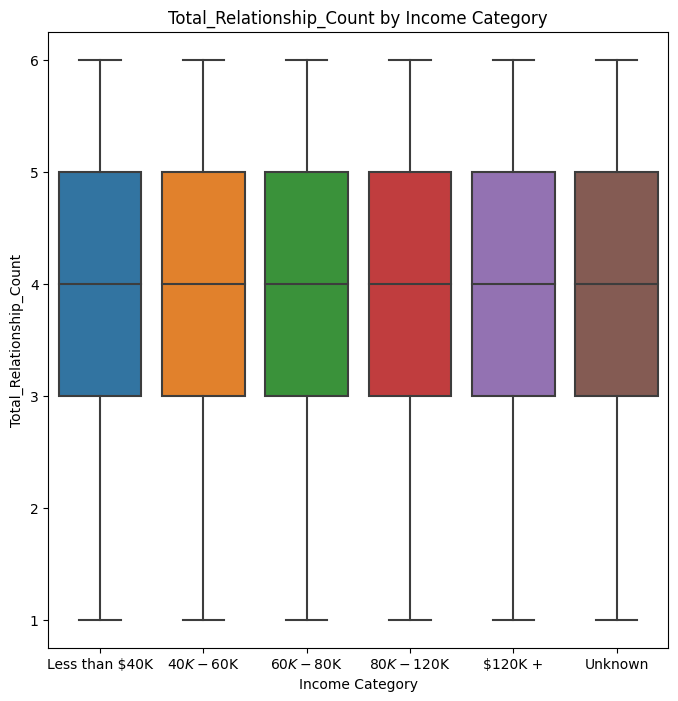

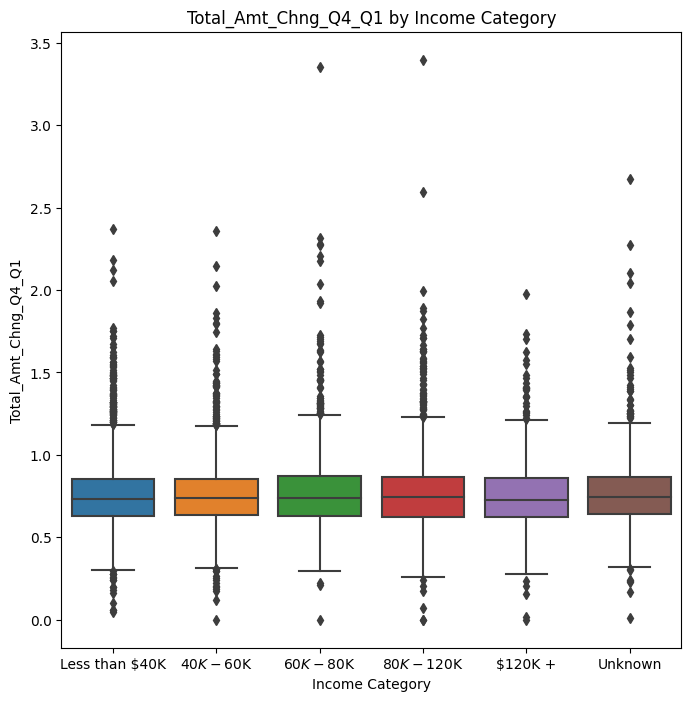

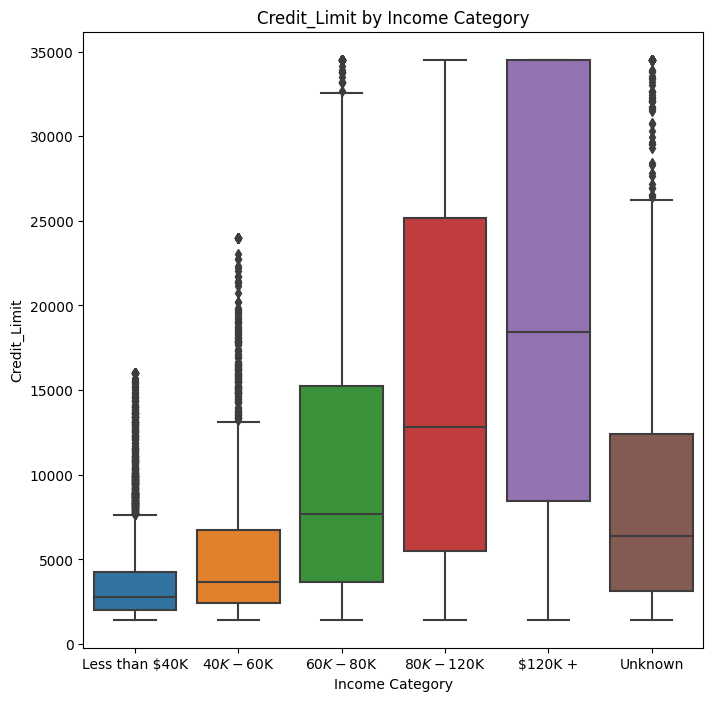

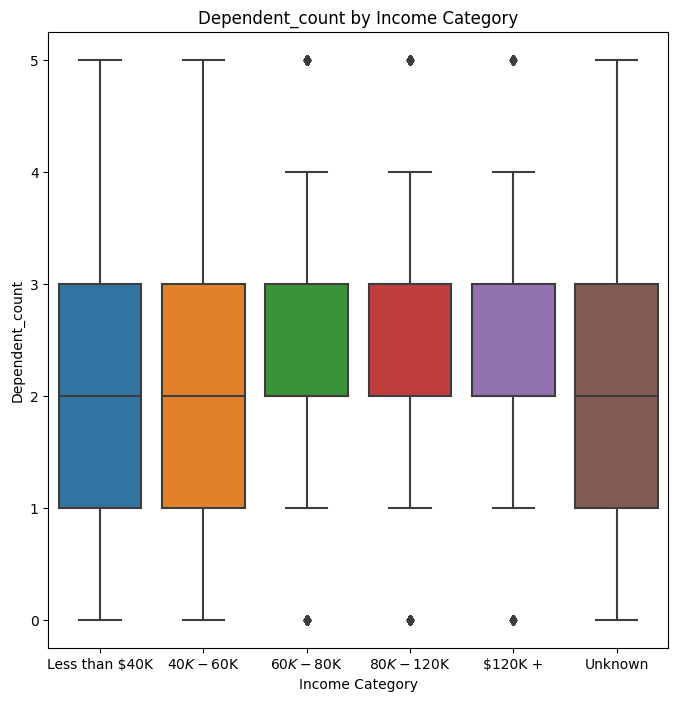

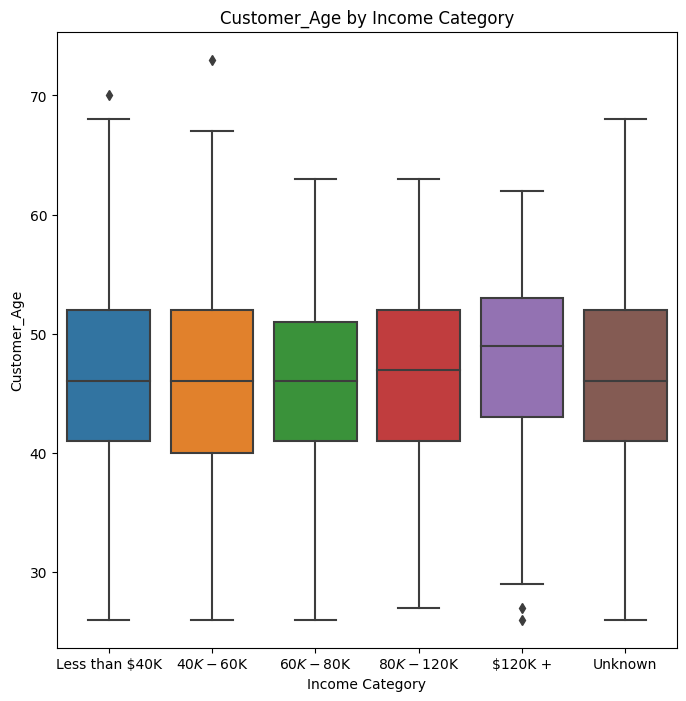

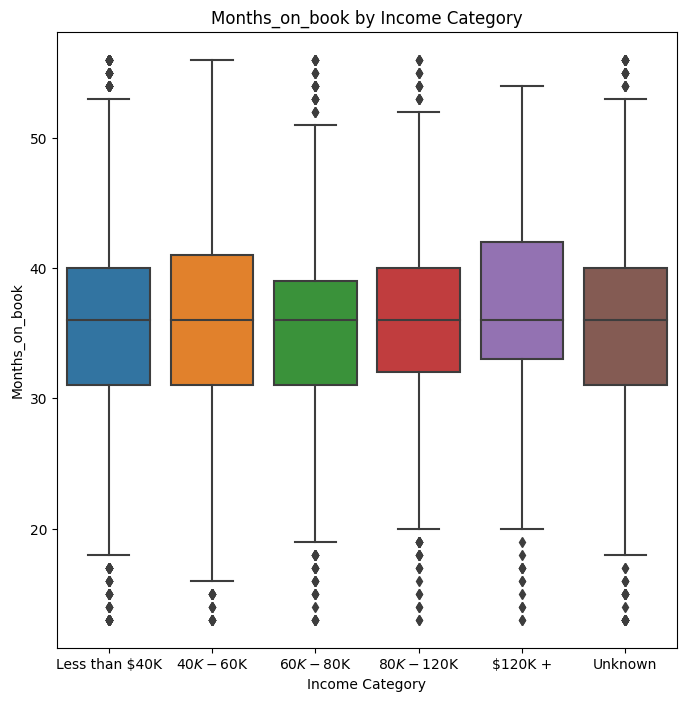

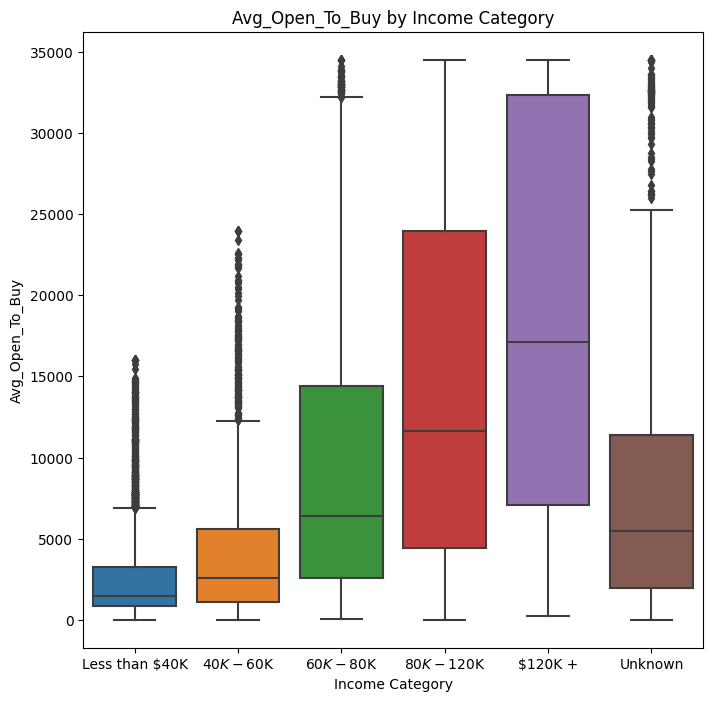

In [29]:
for col in num_cols_by_pvalue_asc:
    plt.figure(figsize=(8, 8))  # 그림 크기 설정
    # Income_Category별로 Total_Trans_Ct의 scatter plot을 그립니다. jitter는 점들이 겹치는 것을 방지합니다.
    sns.boxplot(x='Income_Category', y=col, data=df, order=order_dict['Income_Category'])

    plt.title(f'{col} by Income Category')  # 그래프 제목
    plt.xlabel('Income Category')  # x축 레이블
    plt.ylabel(col)  # y축 레이블
    plt.show()  # 그래프 보여주기

### New Column: Trans_Amt_by_Ct

In [30]:
df['Trans_Amt_by_Ct']=df['Total_Trans_Amt']/df['Total_Trans_Ct']
df[['Total_Trans_Amt','Total_Trans_Ct','Trans_Amt_by_Ct']]

Total_Trans_Amt  Total_Trans_Ct  Trans_Amt_by_Ct
0                 1144              42        27.238095
1                 1291              33        39.121212
2                 1887              20        94.350000
3                 1171              20        58.550000
4                  816              28        29.142857
...                ...             ...              ...
10122            15476             117       132.273504
10123             8764              69       127.014493
10124            10291              60       171.516667
10125             8395              62       135.403226
10126            10294              61       168.754098

[10127 rows x 3 columns]

In [31]:
corr, p_value = pointbiserialr(df['Attrition_Flag_binary'], df['Trans_Amt_by_Ct'])
print(corr)
print(p_value)

0.01624574616973605
0.102098491325304


In [32]:
pivot_contact=pd.pivot_table(df, index='Contacts_Count_12_mon', columns='Attrition_Flag', aggfunc='size')
print(pivot_contact)

pivot_contact_ratio=pivot_contact.div(pivot_contact.sum(axis=1),axis=0)
pivot_contact_ratio

Attrition_Flag         Attrited Customer  Existing Customer
Contacts_Count_12_mon                                      
0                                    7.0              392.0
1                                  108.0             1391.0
2                                  403.0             2824.0
3                                  681.0             2699.0
4                                  315.0             1077.0
5                                   59.0              117.0
6                                   54.0                NaN


Attrition_Flag         Attrited Customer  Existing Customer
Contacts_Count_12_mon                                      
0                               0.017544           0.982456
1                               0.072048           0.927952
2                               0.124884           0.875116
3                               0.201479           0.798521
4                               0.226293           0.773707
5                               0.335227           0.664773
6                               1.000000                NaN

<Axes: ylabel='Contacts_Count_12_mon'>

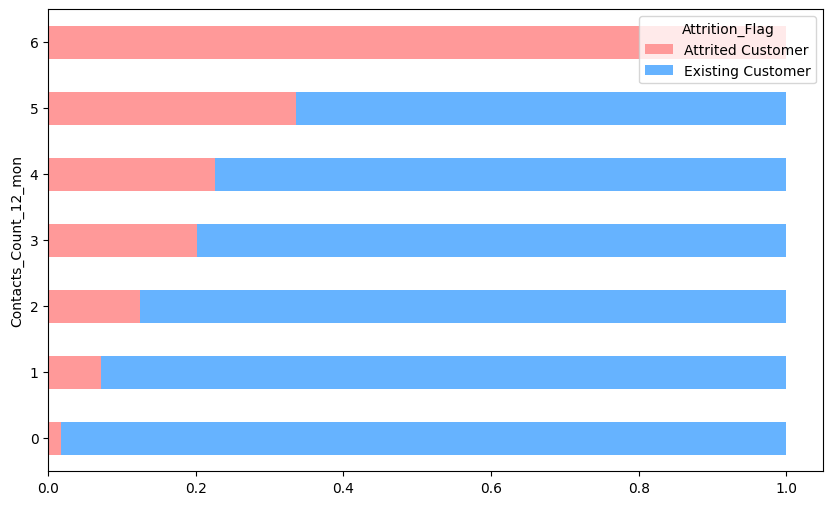

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
pivot_contact_ratio.plot(kind='barh', stacked=True, color=['#ff9999', '#66b3ff'], ax=ax)

In [34]:
num_cols_like_ctgr=['Contacts_Count_12_mon','Months_Inactive_12_mon','Total_Relationship_Count','Dependent_count','Customer_Age']

pivot_tables = {}
for col in num_cols_like_ctgr:
    pivot_tables[col] = pd.pivot_table(df, index=col, columns='Attrition_Flag', aggfunc='size')

pivot_tables_ratio = {}
for col, table in pivot_tables.items():
    # Calculate the ratio
    pivot_tables_ratio[col] = table.div(table.sum(axis=1), axis=0)

# Now you can access each pivot table by the column name
for col, table in pivot_tables.items():
    print(f"Pivot Table for {col}:")
    print(table)
    print()  # Print a new line for better readability between tables
    
for col, table in pivot_tables_ratio.items():
    print(f"Pivot Table Ratios for {col}:")
    print(table)
    print()  # Print a new line for better readability

Pivot Table for Contacts_Count_12_mon:
Attrition_Flag         Attrited Customer  Existing Customer
Contacts_Count_12_mon                                      
0                                    7.0              392.0
1                                  108.0             1391.0
2                                  403.0             2824.0
3                                  681.0             2699.0
4                                  315.0             1077.0
5                                   59.0              117.0
6                                   54.0                NaN

Pivot Table for Months_Inactive_12_mon:
Attrition_Flag          Attrited Customer  Existing Customer
Months_Inactive_12_mon                                      
0                                      15                 14
1                                     100               2133
2                                     505               2777
3                                     826               3020
4             

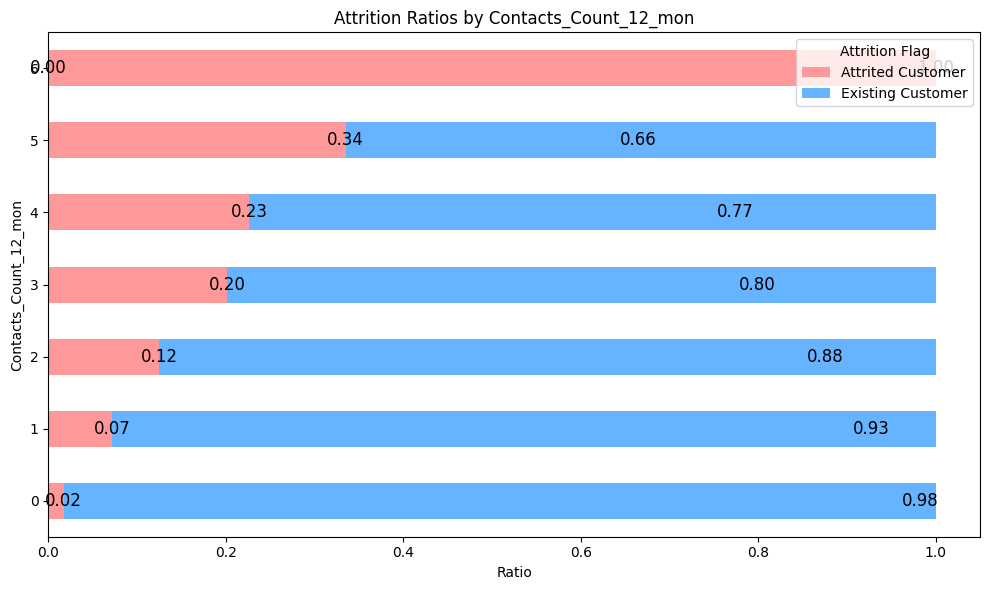

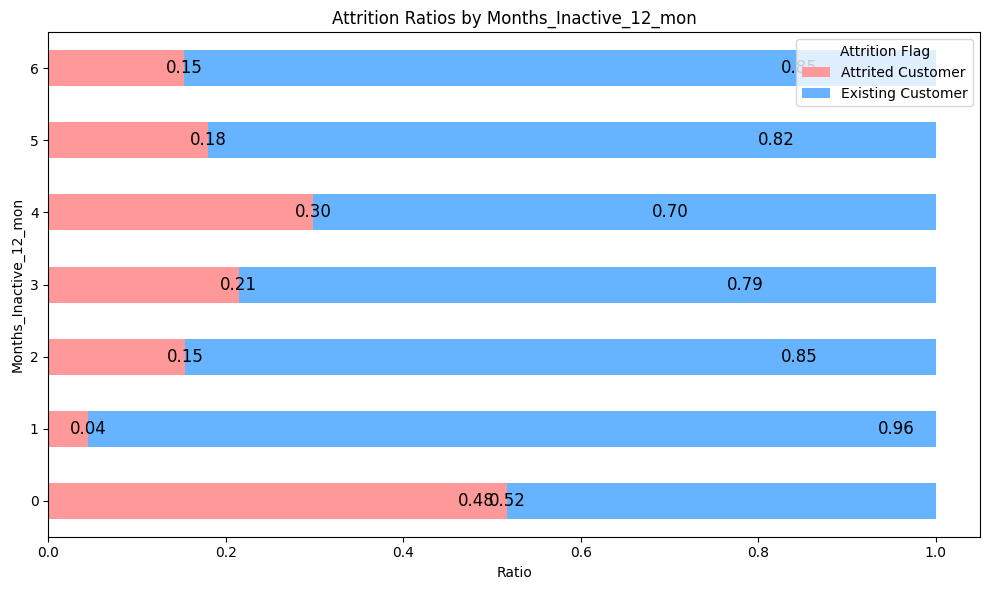

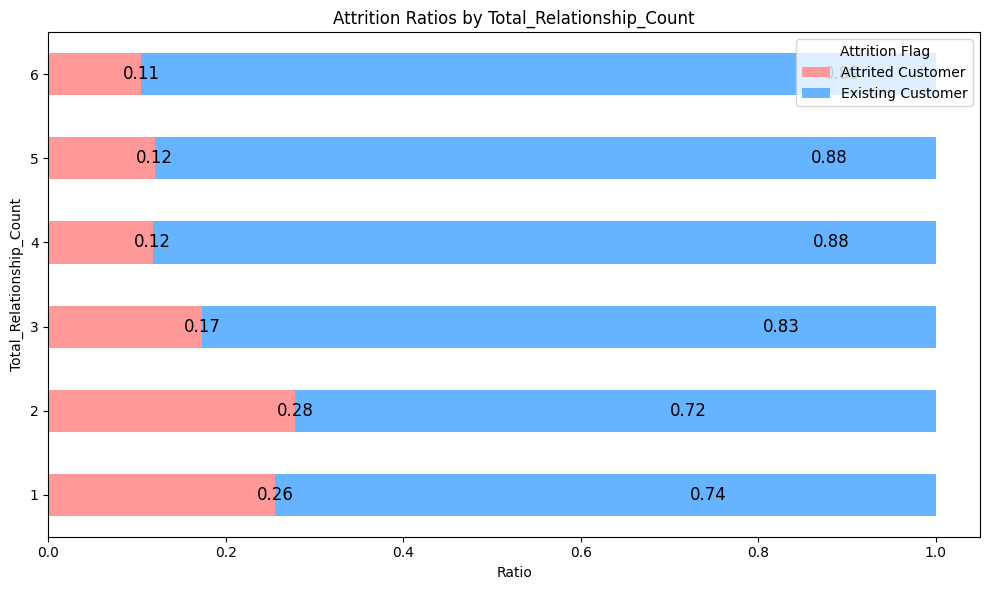

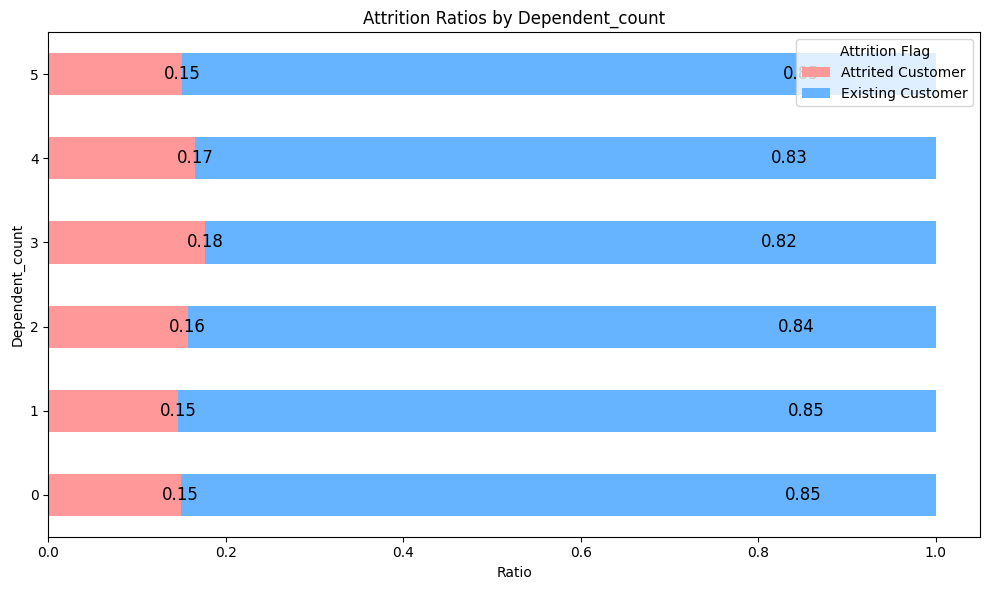

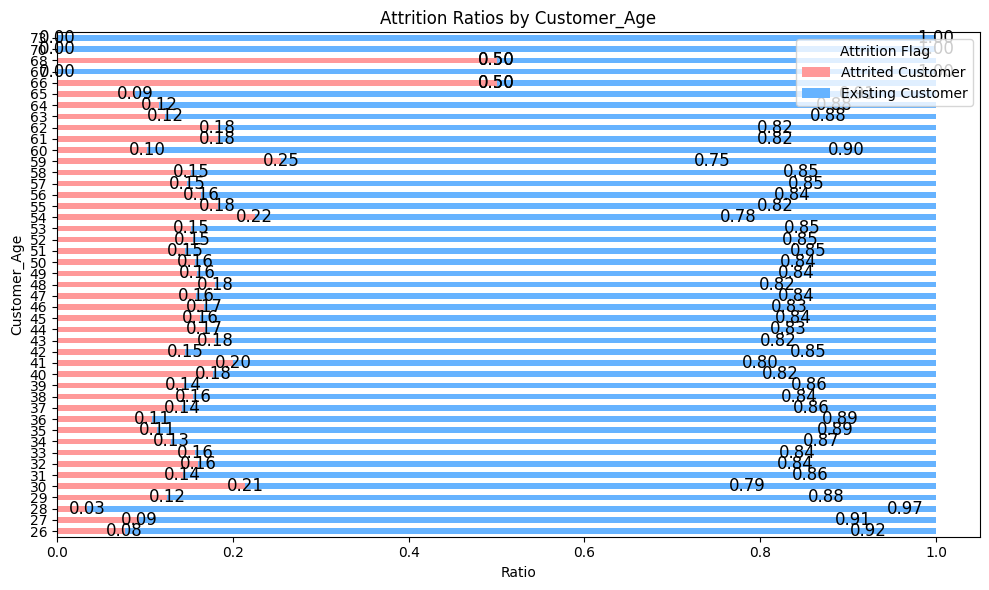

In [35]:
for col, table in pivot_tables_ratio.items():
     # Reorder the table based on the 'order_dict' for the current column if it exists
        
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and a set of subplots with custom size
    
     # Capture the return value of the plot which contains the bar containers
    bar_containers = table.plot(kind='barh', stacked=True, color=['#ff9999', '#66b3ff'], ax=ax).containers
    
#     table.plot(kind='barh', stacked=True, color=['#ff9999','#66b3ff'], ax=ax)  # Stacked horizontal bar plot
    ax.set_xlabel('Ratio')  # X-axis label
    ax.set_title(f'Attrition Ratios by {col}')  # Title of the plot
    ax.legend(title='Attrition Flag')  # Legend with title
    
    # Annotate each bar
    for container in bar_containers:
        x=0
        for bar in container:
#             print(bar)
#             Format the number to be displayed. You can adjust the formatting to your preference
            value = f'{bar.get_width():.2f}'

            ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, value, 
                        va='center', ha='center', fontsize=12, color='black')
            
        
    plt.tight_layout()  # Adjust subplots to give some padding